# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [178]:
sat_2017 = pd.read_csv("../Desktop/Lessons/Project1234/project_1/data/sat_2017.csv")
act_2017 = pd.read_csv("../Desktop/Lessons/Project1234/project_1/data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [179]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [180]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [181]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [182]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

SAT 2017 data contains a table of 51 rows x 5 columns with each state as the value in the first column, in relation to its individual:
- SAT participation rate
- average 'Evidence-Based Reading and Writing' score
- average Math score
- combined Total average scores (out of 1600)

ACT 2017 data contains a table of 52 rows x 7 columns with each state as the value in the first column, in relation to its individual:
- ACT participation rate
- average English score
- average Math score
- average Reading score
- average Science score 
- average Composite scores (out of 36)

ACT data has 52 entries (51 States) vs SAT has 51 entries (50 States) indicating that ACT data has an outlier that is in additional from SAT
- Average National ACT entries is included in the data as well which have to be omitted as it is not a state by classification rather it is a total average of all states values.



#### 4a. Does the data look complete? 

Data would give a better overview of the SAT/ACT trends over 2017-2018 if it had the following:
1. General population of each state
2. No of participants that took SAT/ACT in each state
instead of just giving us a rounded up participation rate


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [183]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


SAT 2017 has a minimum math score of 52 which is far off from all the math scores of other states, indicating an incorrect value

In [184]:
sat_2017.sort_values(['Math']).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


In [185]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


ACT 2017 has a minimum math score of 2.3 which is far off from all the math scores of other states, indicating an incorrect value

In [186]:
act_2017.sort_values(['Science']).head()

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [187]:
# replace incorrect value with source data from https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/
(sat_2017['Math'].replace((52, 524),inplace=True))

In [188]:
sat_2017.sort_values(['Math']).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005
9,Florida,83%,520,497,1017


In [189]:
# replace incorrect value with source data from https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows
sat_2017.sort_values(['Math']).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005
9,Florida,83%,520,497,1017


In [190]:
sat_2017.sort_values(['Math']).head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005
9,Florida,83%,520,497,1017


In [191]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 5. What are your data types? 
Display the data types of each feature. 

In [192]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [193]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Participation's data type in both SAT & ACT data is indicated to be an 'object' where it has to be 'float' as it has an integer + character (%)

Composite's data type in ACT data has to be 'float' as it is the cumulation of all other float values in English, Math, Reading and Science indicating that it might have a character in at least one composite value

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [194]:
def convert_percent_to_float(x):
    x= x.replace("%","")
    x=float(x)/100
    return x


In [195]:
sat_2017['Participation']= sat_2017['Participation'].apply(convert_percent_to_float)

In [196]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,594,1055


In [197]:
act_2017['Participation']= act_2017['Participation'].apply(convert_percent_to_float)

In [198]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [199]:
act_2017.Composite.unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [200]:
def convert_object_to_float(y):
    y= y.replace("20.2x","20.2")
    y=float(y)/100
    return y

In [201]:
act_2017['Composite']= act_2017['Composite'].apply(convert_object_to_float)

In [202]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,0.210
1,Alabama,1.00,18.9,18.4,19.7,19.4,0.192
2,Alaska,0.65,18.7,19.8,20.4,19.9,0.198
3,Arizona,0.62,18.6,19.8,20.1,19.8,0.197
4,Arkansas,1.00,18.9,19.0,19.7,19.5,0.194


- Display the data types again to confirm they are correct.

In [203]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [204]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [205]:
sat_2017.rename(columns={'State':'state',
    'Participation': 'sat_participation_17',
    'Evidence-Based Reading and Writing': 'sat_ebrw_17',
    'Math': 'sat_math_17',
    'Total': 'sat_total_17'}, inplace=True)

In [206]:
sat_2017.head()

,state,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,594,1055


In [207]:
act_2017.rename(columns={'State':'state',
'Participation': 'act_participation_17',
'English': 'act_english_17',
'Math': 'act_math_17',
'Reading': 'act_reading_17',
'Science': 'act_science_17',
 'Composite': 'act_composite_17'}, inplace=True)

In [208]:
act_2017.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,0.60,20.3,20.7,21.4,21.0,0.210
1,Alabama,1.00,18.9,18.4,19.7,19.4,0.192
2,Alaska,0.65,18.7,19.8,20.4,19.9,0.198
3,Arizona,0.62,18.6,19.8,20.1,19.8,0.197
4,Arkansas,1.00,18.9,19.0,19.7,19.5,0.194


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|State name for associated SAT/ACT average scores and participation rates| 
|act_participation|object|ACT|participation rate for the ACT in each US state (values: 0-1)|  
|act_english|float|ACT|average score on english section of ACT (values: 0-36)| 
|act_math|float|ACT|average score on math section of ACT (values: 0-36)| 
|act_reading|float|ACT|average score on reading section of ACT (values: 0-36)|
|act_science|float|ACT|average score on science section of ACT (values: 0-36)| 
|act_composite|float|ACT|average score on composite section of ACT (values: 0-36)| 
|sat_participation|object|SAT|participation rate for the ACT in each US state (values: 0-1)|  
|sat_ebrw|int|SAT|average score on reading & writing section of SAT (values: 200-800)| 
|sat_math|int|SAT|average score on math section of SAT (values: 200-800)| 
|sat_total|int|SAT|average score on SAT (average of combined reading & writing + math)(values: 200-800)|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [209]:
#Removing 'National' from State
act_2017.drop(index=0, inplace=True)

In [210]:
act_2017

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
1,Alabama,1.00,18.9,18.4,19.7,19.4,0.192
2,Alaska,0.65,18.7,19.8,20.4,19.9,0.198
3,Arizona,0.62,18.6,19.8,20.1,19.8,0.197
4,Arkansas,1.00,18.9,19.0,19.7,19.5,0.194
5,California,0.31,22.5,22.7,23.1,22.2,0.228
6,Colorado,1.00,20.1,20.3,21.2,20.9,0.208
7,Connecticut,0.31,25.5,24.6,25.6,24.6,0.252
8,Delaware,0.18,24.1,23.4,24.8,23.6,0.241
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,0.242
10,Florida,0.73,19.0,19.4,21.0,19.4,0.198


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [211]:
combined_2017 = act_2017.merge(sat_2017, how="left")

In [212]:
combined_2017

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17
0,Alabama,1.00,18.9,18.4,19.7,19.4,0.192,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,0.198,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,0.197,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,0.194,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,0.228,0.53,531,594,1055
5,Colorado,1.00,20.1,20.3,21.2,20.9,0.208,0.11,606,595,1201
6,Connecticut,0.31,25.5,24.6,25.6,24.6,0.252,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,0.241,1.00,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,0.242,1.00,482,468,950
9,Florida,0.73,19.0,19.4,21.0,19.4,0.198,0.83,520,497,1017


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [213]:
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [214]:
sat_2018 = pd.read_csv("../Desktop/Lessons/Project1234/project_1/data/sat_2018.csv")
act_2018 = pd.read_csv("../Desktop/Lessons/Project1234/project_1/data/act_2018.csv")

In [215]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [216]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [217]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [218]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [219]:
act_2018.drop_duplicates(subset=None, keep="last", inplace = True)

In [220]:
act_2018.describe()

,Composite
count,51.000000
mean,21.496078
std,2.111583
min,17.700000
25%,19.950000
50%,21.300000
75%,23.650000
max,25.600000


In [221]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [227]:
sat_2018['Participation']= sat_2018['Participation'].apply(convert_percent_to_float)

In [228]:
sat_2018.Participation.dtypes

dtype('float64')

In [229]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [230]:
act_2018['Participation']= act_2018['Participation'].apply(convert_percent_to_float)

In [231]:
act_2018.Participation.dtypes

dtype('float64')

In [232]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [233]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [234]:
sat_2018.rename(columns={'State':'state',
'Participation': 'sat_participation_18',
'Evidence-Based Reading and Writing': 'sat_ebrw_18',
'Math': 'sat_math_18',
'Total': 'sat_total_18'}, inplace=True)

In [235]:
sat_2018.head(10)

,state,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076
5,Colorado,1.00,519,506,1025
6,Connecticut,1.00,535,519,1053
7,Delaware,1.00,505,492,998
8,District of Columbia,0.92,497,480,977
9,Florida,0.56,550,549,1099


In [236]:
act_2018.head(10)

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9
6,Connecticut,0.26,25.6
7,Delaware,0.17,23.8
8,District of columbia,0.32,23.6
9,Florida,0.66,19.9


In [237]:
act_2018.rename(columns={'State':'state',
'Participation': 'act_participation_18',
'Composite': 'act_composite_18'}, inplace=True)

In [238]:
act_2018.iloc[8:9 ,:1] = 'District of Columbia'

In [239]:
act_2018.head(10)

,state,act_participation_18,act_composite_18
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9
6,Connecticut,0.26,25.6
7,Delaware,0.17,23.8
8,District of Columbia,0.32,23.6
9,Florida,0.66,19.9


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [240]:
combined_2018 = act_2018.merge(sat_2018, how="left")

In [241]:
combined_2018.head()

,state,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


In [242]:
combined_2018.describe()

,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.617255,21.496078,0.457451,563.686275,556.235294,1120.019608
std,0.340371,2.111583,0.373143,47.502627,47.772623,94.155083
min,0.070000,17.700000,0.020000,480.000000,480.000000,977.000000
25%,0.285000,19.950000,0.045000,534.500000,522.500000,1057.500000
50%,0.660000,21.300000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.650000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


In [243]:
final = combined_2017.merge(combined_2018, how='left')

In [244]:
final.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,0.192,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,0.198,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,0.197,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,0.194,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,0.228,0.53,531,594,1055,0.27,22.7,0.60,540,536,1076


In [245]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
state                   51 non-null object
act_participation_17    51 non-null float64
act_english_17          51 non-null float64
act_math_17             51 non-null float64
act_reading_17          51 non-null float64
act_science_17          51 non-null float64
act_composite_17        51 non-null float64
sat_participation_17    51 non-null float64
sat_ebrw_17             51 non-null int64
sat_math_17             51 non-null int64
sat_total_17            51 non-null int64
act_participation_18    51 non-null float64
act_composite_18        51 non-null float64
sat_participation_18    51 non-null float64
sat_ebrw_18             51 non-null int64
sat_math_18             51 non-null int64
sat_total_18            51 non-null int64
dtypes: float64(10), int64(6), object(1)
memory usage: 7.2+ KB


In [246]:
final.to_csv('final.csv')

In [247]:
final.describe()

,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.041176,0.215196,0.398039,569.117647,557.901961,1126.098039,0.617255,21.496078,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,3.182463,0.020207,0.352766,45.666901,47.565220,92.494812,0.340371,2.111583,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,2.300000,0.178000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.900000,0.198000,0.040000,533.500000,522.000000,1055.500000,0.285000,19.950000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,0.214000,0.380000,559.000000,551.000000,1107.000000,0.660000,21.300000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,22.750000,0.236000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.650000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,0.255000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [251]:
final.describe()

,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.041176,0.215196,0.398039,569.117647,557.901961,1126.098039,0.617255,21.496078,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,3.182463,0.020207,0.352766,45.666901,47.565220,92.494812,0.340371,2.111583,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,2.300000,0.178000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.900000,0.198000,0.040000,533.500000,522.000000,1055.500000,0.285000,19.950000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,0.214000,0.380000,559.000000,551.000000,1107.000000,0.660000,21.300000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,22.750000,0.236000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.650000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,0.255000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [257]:
def std_dev(x):
    
    n = 0
    total = 0 
    
    for i in x:
        total= total + i
        n= n + 1
    mean=total/n
    
    summ=0
    
    for i in x:
        summ= summ + (i-mean)**2
    sd=(summ/n)**0.5
    
    return sd

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [258]:
final_sd = final.loc[:, final.columns != 'state'].apply(std_dev)

In [259]:
final_sd.head()

act_participation_17    0.318242
act_english_17          2.330488
act_math_17             1.962462
act_reading_17          2.046903
act_science_17          3.151108
dtype: float64

In [261]:
final_sd

act_participation_17     0.318242
act_english_17           2.330488
act_math_17              1.962462
act_reading_17           2.046903
act_science_17           3.151108
act_composite_17         0.020008
sat_participation_17     0.349291
sat_ebrw_17             45.216970
sat_math_17             47.096586
sat_total_17            91.583511
act_participation_18     0.337017
act_composite_18         2.090779
sat_participation_18     0.369466
sat_ebrw_18             47.034610
sat_math_18             47.301946
sat_total_18            93.227424
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [263]:
final.std()

act_participation_17     0.321408
act_english_17           2.353677
act_math_17              1.981989
act_reading_17           2.067271
act_science_17           3.182463
act_composite_17         0.020207
sat_participation_17     0.352766
sat_ebrw_17             45.666901
sat_math_17             47.565220
sat_total_17            92.494812
act_participation_18     0.340371
act_composite_18         2.111583
sat_participation_18     0.373143
sat_ebrw_18             47.502627
sat_math_18             47.772623
sat_total_18            94.155083
dtype: float64

Answer

There is a slight difference between calculated standard deviations and np.std menthod

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [269]:
final.sort_values(by='sat_participation_17', ascending=False).head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,0.242,1.00,482,468,950,0.32,23.6,0.92,497,480,977
22,Michigan,0.29,24.1,23.7,24.5,23.8,0.241,1.00,509,495,1005,0.22,24.2,1.00,511,499,1011
6,Connecticut,0.31,25.5,24.6,25.6,24.6,0.252,1.00,530,512,1041,0.26,25.6,1.00,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,0.241,1.00,503,492,996,0.17,23.8,1.00,505,492,998
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,0.255,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063


2017 SAT Highest Participantion Rates:
- District of Columbia
- Michigan
- Connecticut
- Delaware
- New Hampshire

In [270]:
final.sort_values(by='sat_participation_17', ascending=True).head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
34,North Dakota,0.98,19.0,20.4,20.5,20.6,0.203,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
24,Mississippi,1.00,18.2,18.1,18.8,18.8,0.186,0.02,634,607,1242,1.00,18.6,0.03,630,606,1236
15,Iowa,0.67,21.2,21.3,22.6,22.1,0.219,0.02,641,635,1275,0.68,21.8,0.03,634,631,1265
25,Missouri,1.00,19.8,19.9,20.8,20.5,0.204,0.03,640,631,1271,1.00,20.0,0.04,633,629,1262
44,Utah,1.00,19.5,19.9,20.8,20.6,0.203,0.03,624,614,1238,1.00,20.4,0.04,480,530,1010


2017 SAT Lowest Participantion Rates:
- North Dakota
- Mississippi	
- Iowa
- Missouri
- Utah

In [273]:
final.sort_values(by='sat_participation_18', ascending=False).head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
5,Colorado,1.00,20.1,20.3,21.2,20.9,0.208,0.11,606,595,1201,0.30,23.9,1.0,519,506,1025
6,Connecticut,0.31,25.5,24.6,25.6,24.6,0.252,1.00,530,512,1041,0.26,25.6,1.0,535,519,1053
7,Delaware,0.18,24.1,23.4,24.8,23.6,0.241,1.00,503,492,996,0.17,23.8,1.0,505,492,998
22,Michigan,0.29,24.1,23.7,24.5,23.8,0.241,1.00,509,495,1005,0.22,24.2,1.0,511,499,1011
12,Idaho,0.38,21.9,21.8,23.0,22.1,0.223,0.93,513,493,1005,0.36,22.3,1.0,508,493,1001


2018 SAT Highest Participantion Rates:
- Colorado
- Connecticut
- Delaware
- Michigan
- Idaho

In [275]:
final.sort_values(by='sat_participation_18', ascending=True).head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
34,North Dakota,0.98,19.0,20.4,20.5,20.6,0.203,0.02,635,621,1256,0.98,20.3,0.02,640,643,1283
50,Wyoming,1.00,19.4,19.8,20.8,20.6,0.202,0.03,626,604,1230,1.00,20.0,0.03,633,625,1257
41,South Dakota,0.80,20.7,21.5,22.3,22.0,0.218,0.03,612,603,1216,0.77,21.9,0.03,622,618,1240
27,Nebraska,0.84,20.9,20.9,21.9,21.5,0.214,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,0.205,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294


2018 SAT Lowest Participantion Rates:
- North Dakota
- Wyoming
- South Dakota
- Nebraska
- Wisconsin

In [279]:
final.sort_values(by='act_participation_17', ascending=False).head(20)

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,0.192,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
17,Kentucky,1.00,19.6,19.4,20.5,20.1,0.200,0.04,631,616,1247,1.00,20.2,0.04,630,618,1248
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,0.205,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
44,Utah,1.00,19.5,19.9,20.8,20.6,0.203,0.03,624,614,1238,1.00,20.4,0.04,480,530,1010
42,Tennessee,1.00,19.5,19.2,20.1,19.9,0.198,0.05,623,604,1228,1.00,19.6,0.06,624,607,1231
40,South Carolina,1.00,17.5,18.6,19.1,18.9,0.187,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,0.194,0.07,530,517,1047,1.00,19.3,0.08,541,521,1062
33,North Carolina,1.00,17.8,19.3,19.6,19.3,0.191,0.49,546,535,1081,1.00,19.1,0.52,554,543,1098
28,Nevada,1.00,16.3,18.0,18.1,18.2,0.178,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140
26,Montana,1.00,19.0,20.2,21.0,20.5,0.203,0.10,605,591,1196,1.00,20.0,0.10,606,592,1198


2017 ACT Highest Participantion Rates:
- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennessee
- South Carolina
- Oklahoma
- North Carolina
- Nevada	
- Montana
- Mississippi
- Minnesota

In [280]:
final.sort_values(by='act_participation_17', ascending=True).head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
19,Maine,0.08,24.2,24.0,24.8,23.7,0.243,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,0.255,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,0.241,1.00,503,492,996,0.17,23.8,1.00,505,492,998
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,0.240,0.71,539,531,1062,0.15,24.2,0.97,513,505,1018
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,0.237,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086


2017 ACT Lowest Participantion Rates:
- Maine
- New Hampshire
- Delaware
- Rhode Island
- Pennsylvania	

In [281]:
final.sort_values(by='act_participation_18', ascending=False).head(20)

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,0.192,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
17,Kentucky,1.00,19.6,19.4,20.5,20.1,0.200,0.04,631,616,1247,1.00,20.2,0.04,630,618,1248
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,0.205,0.03,642,649,1291,1.00,20.5,0.03,641,653,1294
44,Utah,1.00,19.5,19.9,20.8,20.6,0.203,0.03,624,614,1238,1.00,20.4,0.04,480,530,1010
42,Tennessee,1.00,19.5,19.2,20.1,19.9,0.198,0.05,623,604,1228,1.00,19.6,0.06,624,607,1231
40,South Carolina,1.00,17.5,18.6,19.1,18.9,0.187,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,0.194,0.07,530,517,1047,1.00,19.3,0.08,541,521,1062
35,Ohio,0.75,21.2,21.6,22.5,22.0,0.220,0.12,578,570,1149,1.00,20.3,0.18,552,547,1099
33,North Carolina,1.00,17.8,19.3,19.6,19.3,0.191,0.49,546,535,1081,1.00,19.1,0.52,554,543,1098
28,Nevada,1.00,16.3,18.0,18.1,18.2,0.178,0.26,563,553,1116,1.00,17.7,0.23,574,566,1140


2018 ACT Highest Participantion Rates:
- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennessee
- South Carolina	
- Oklahoma
- Ohio
- North Carolina
- Nevada
- Nebraska
- Montana
- Mississippi
- Louisiana	
- Missouri
- Wyoming	
- Arkansas	

In [282]:
final.sort_values(by='act_participation_18', ascending=True).head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
19,Maine,0.08,24.2,24.0,24.8,23.7,0.243,0.95,513,499,1012,0.07,24.0,0.99,512,501,1013
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,0.240,0.71,539,531,1062,0.15,24.2,0.97,513,505,1018
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,0.255,0.96,532,520,1052,0.16,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,0.241,1.00,503,492,996,0.17,23.8,1.00,505,492,998
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,0.237,0.65,540,531,1071,0.20,23.5,0.70,547,539,1086


2018 ACT Lowest Participantion Rates:
- Maine
- Rhode Island	
- New Hampshire	
- Delaware
- Pennsylvania	

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

(8.0, 0.0)

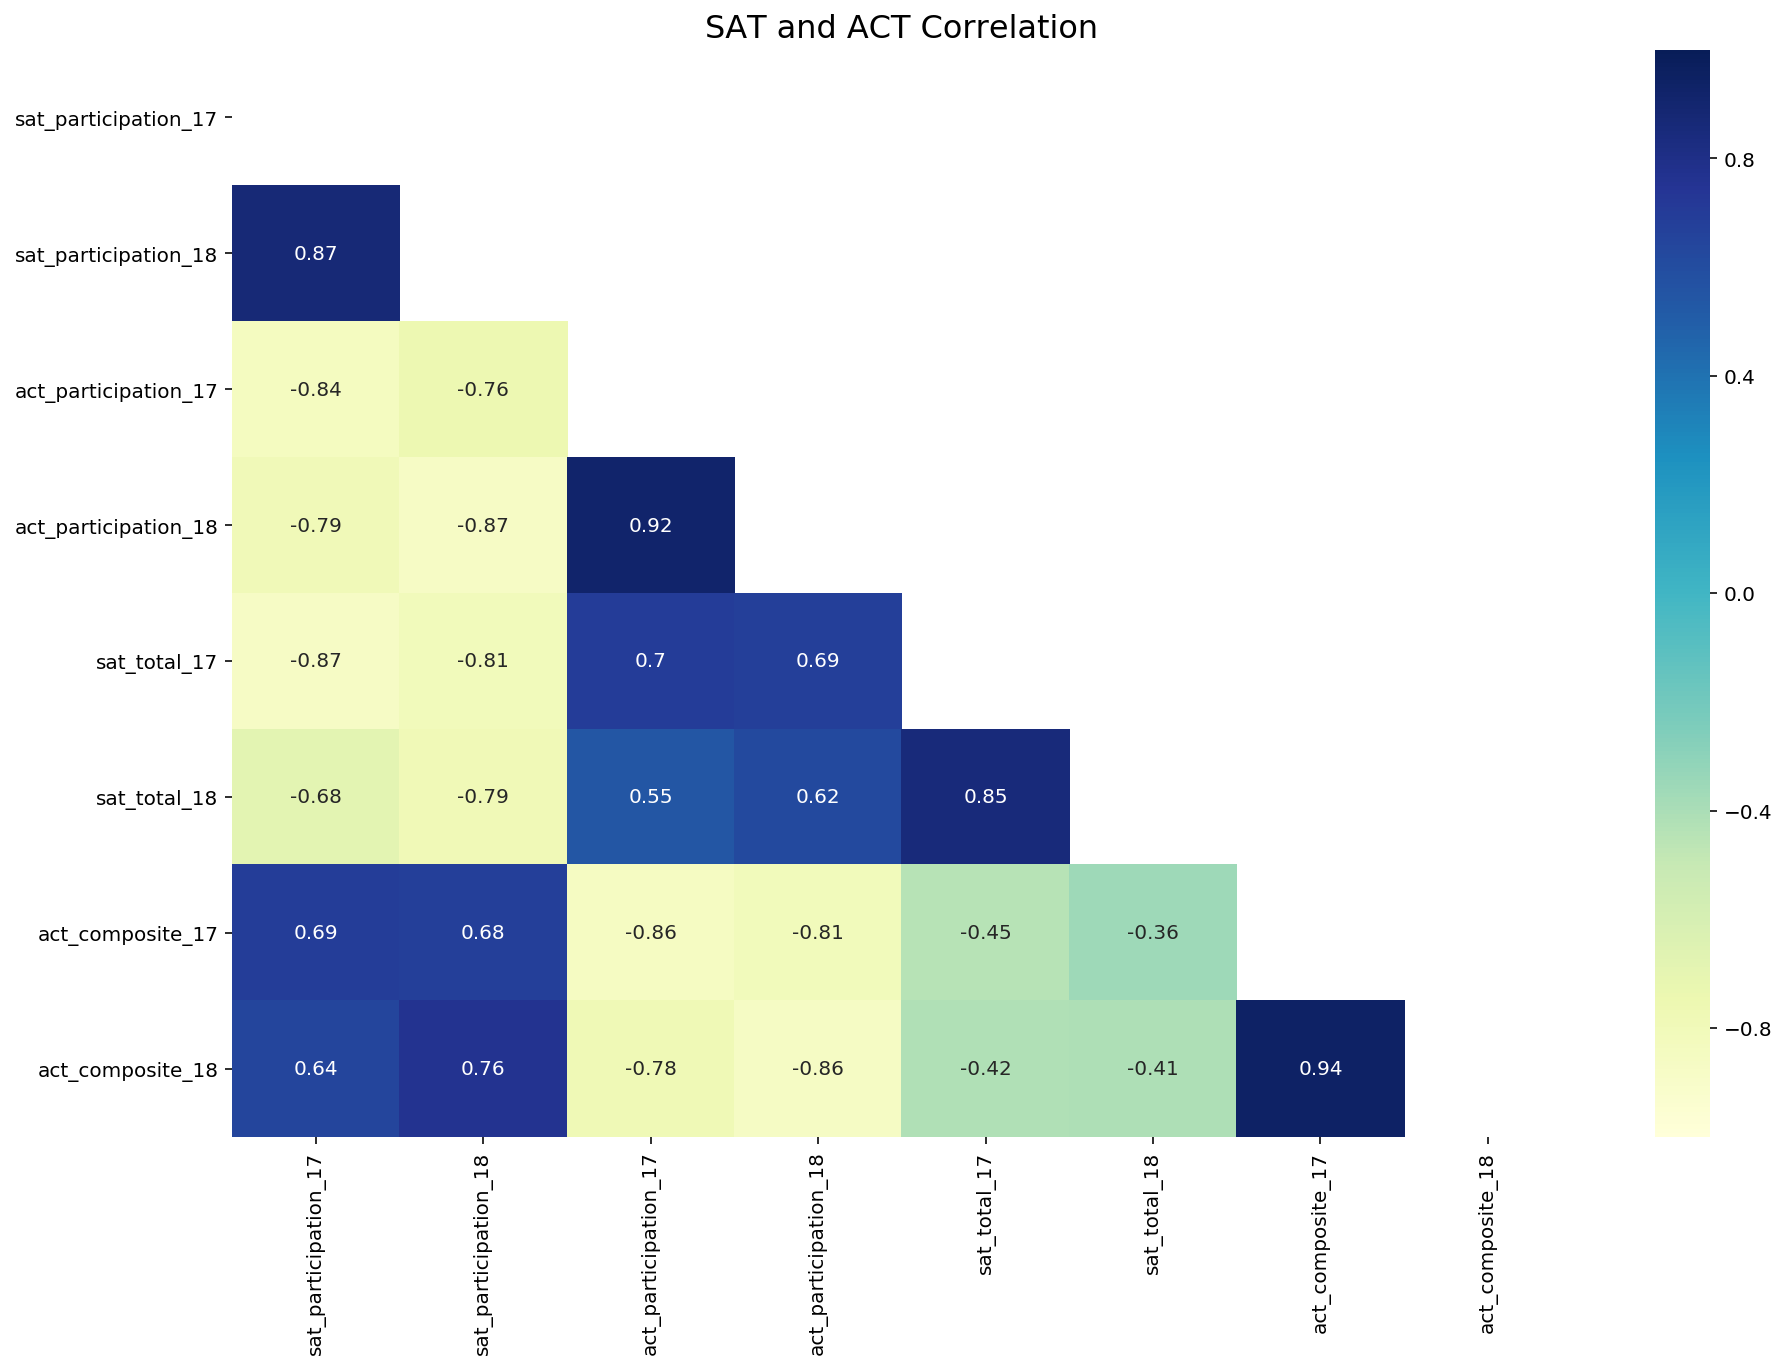

In [288]:
plt.figure(figsize = (15,10))
plt.title('SAT and ACT Correlation', fontsize = 16)
selected = ['sat_participation_17', 'sat_participation_18','act_participation_17', 'act_participation_18', 'sat_total_17','sat_total_18', 'act_composite_17', 'act_composite_18']
mask = np.zeros(final[selected].corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax = sns.heatmap(final[selected].corr(),mask=mask ,vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(4.0, 0.0)

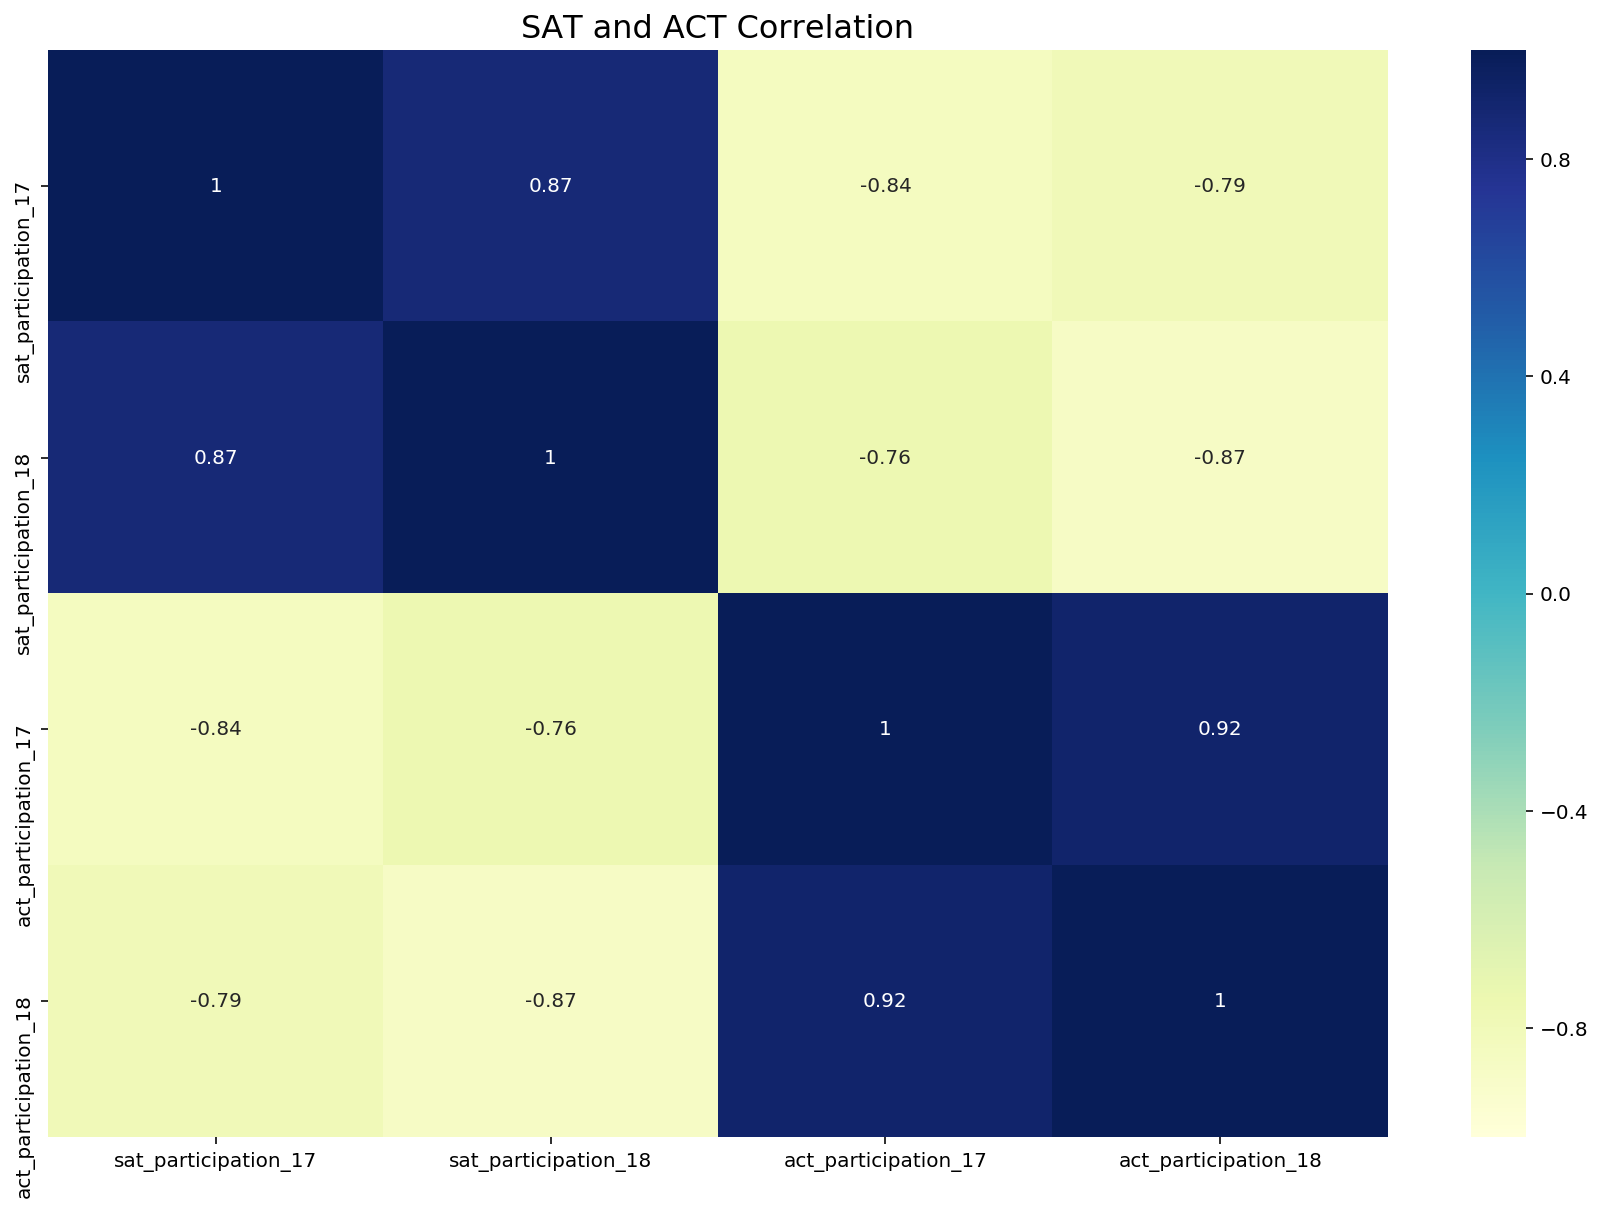

In [286]:
plt.figure(figsize = (15,10))
plt.title('SAT and ACT Correlation', fontsize = 16)
selected = ['sat_participation_17', 'sat_participation_18','act_participation_17', 'act_participation_18']
mask = np.zeros(final[selected].corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))]
ax = sns.heatmap(final[selected].corr(),mask=mask ,vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [295]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, ylabel, xlabel, figtitle):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(25, 25))   # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=12)
        ax[i].set_ylabel(ylabel, fontsize = 10)
        ax[i].set_xlabel(xlabel, fontsize = 10)
        ax[i].set_title(title, fontsize=12)
        fig.suptitle(figtitle, size=16) 
    

In [297]:
final_col = list(final.columns)
final_col = ['sat_total_18','act_composite_18', 'sat_total_17','act_composite_17']
titles = ['SAT 2018 Total Scores', 'ACT 2018 Composite Scores', 'SAT 2017 Total Scores', 'ACT 2017 Composite Scores']

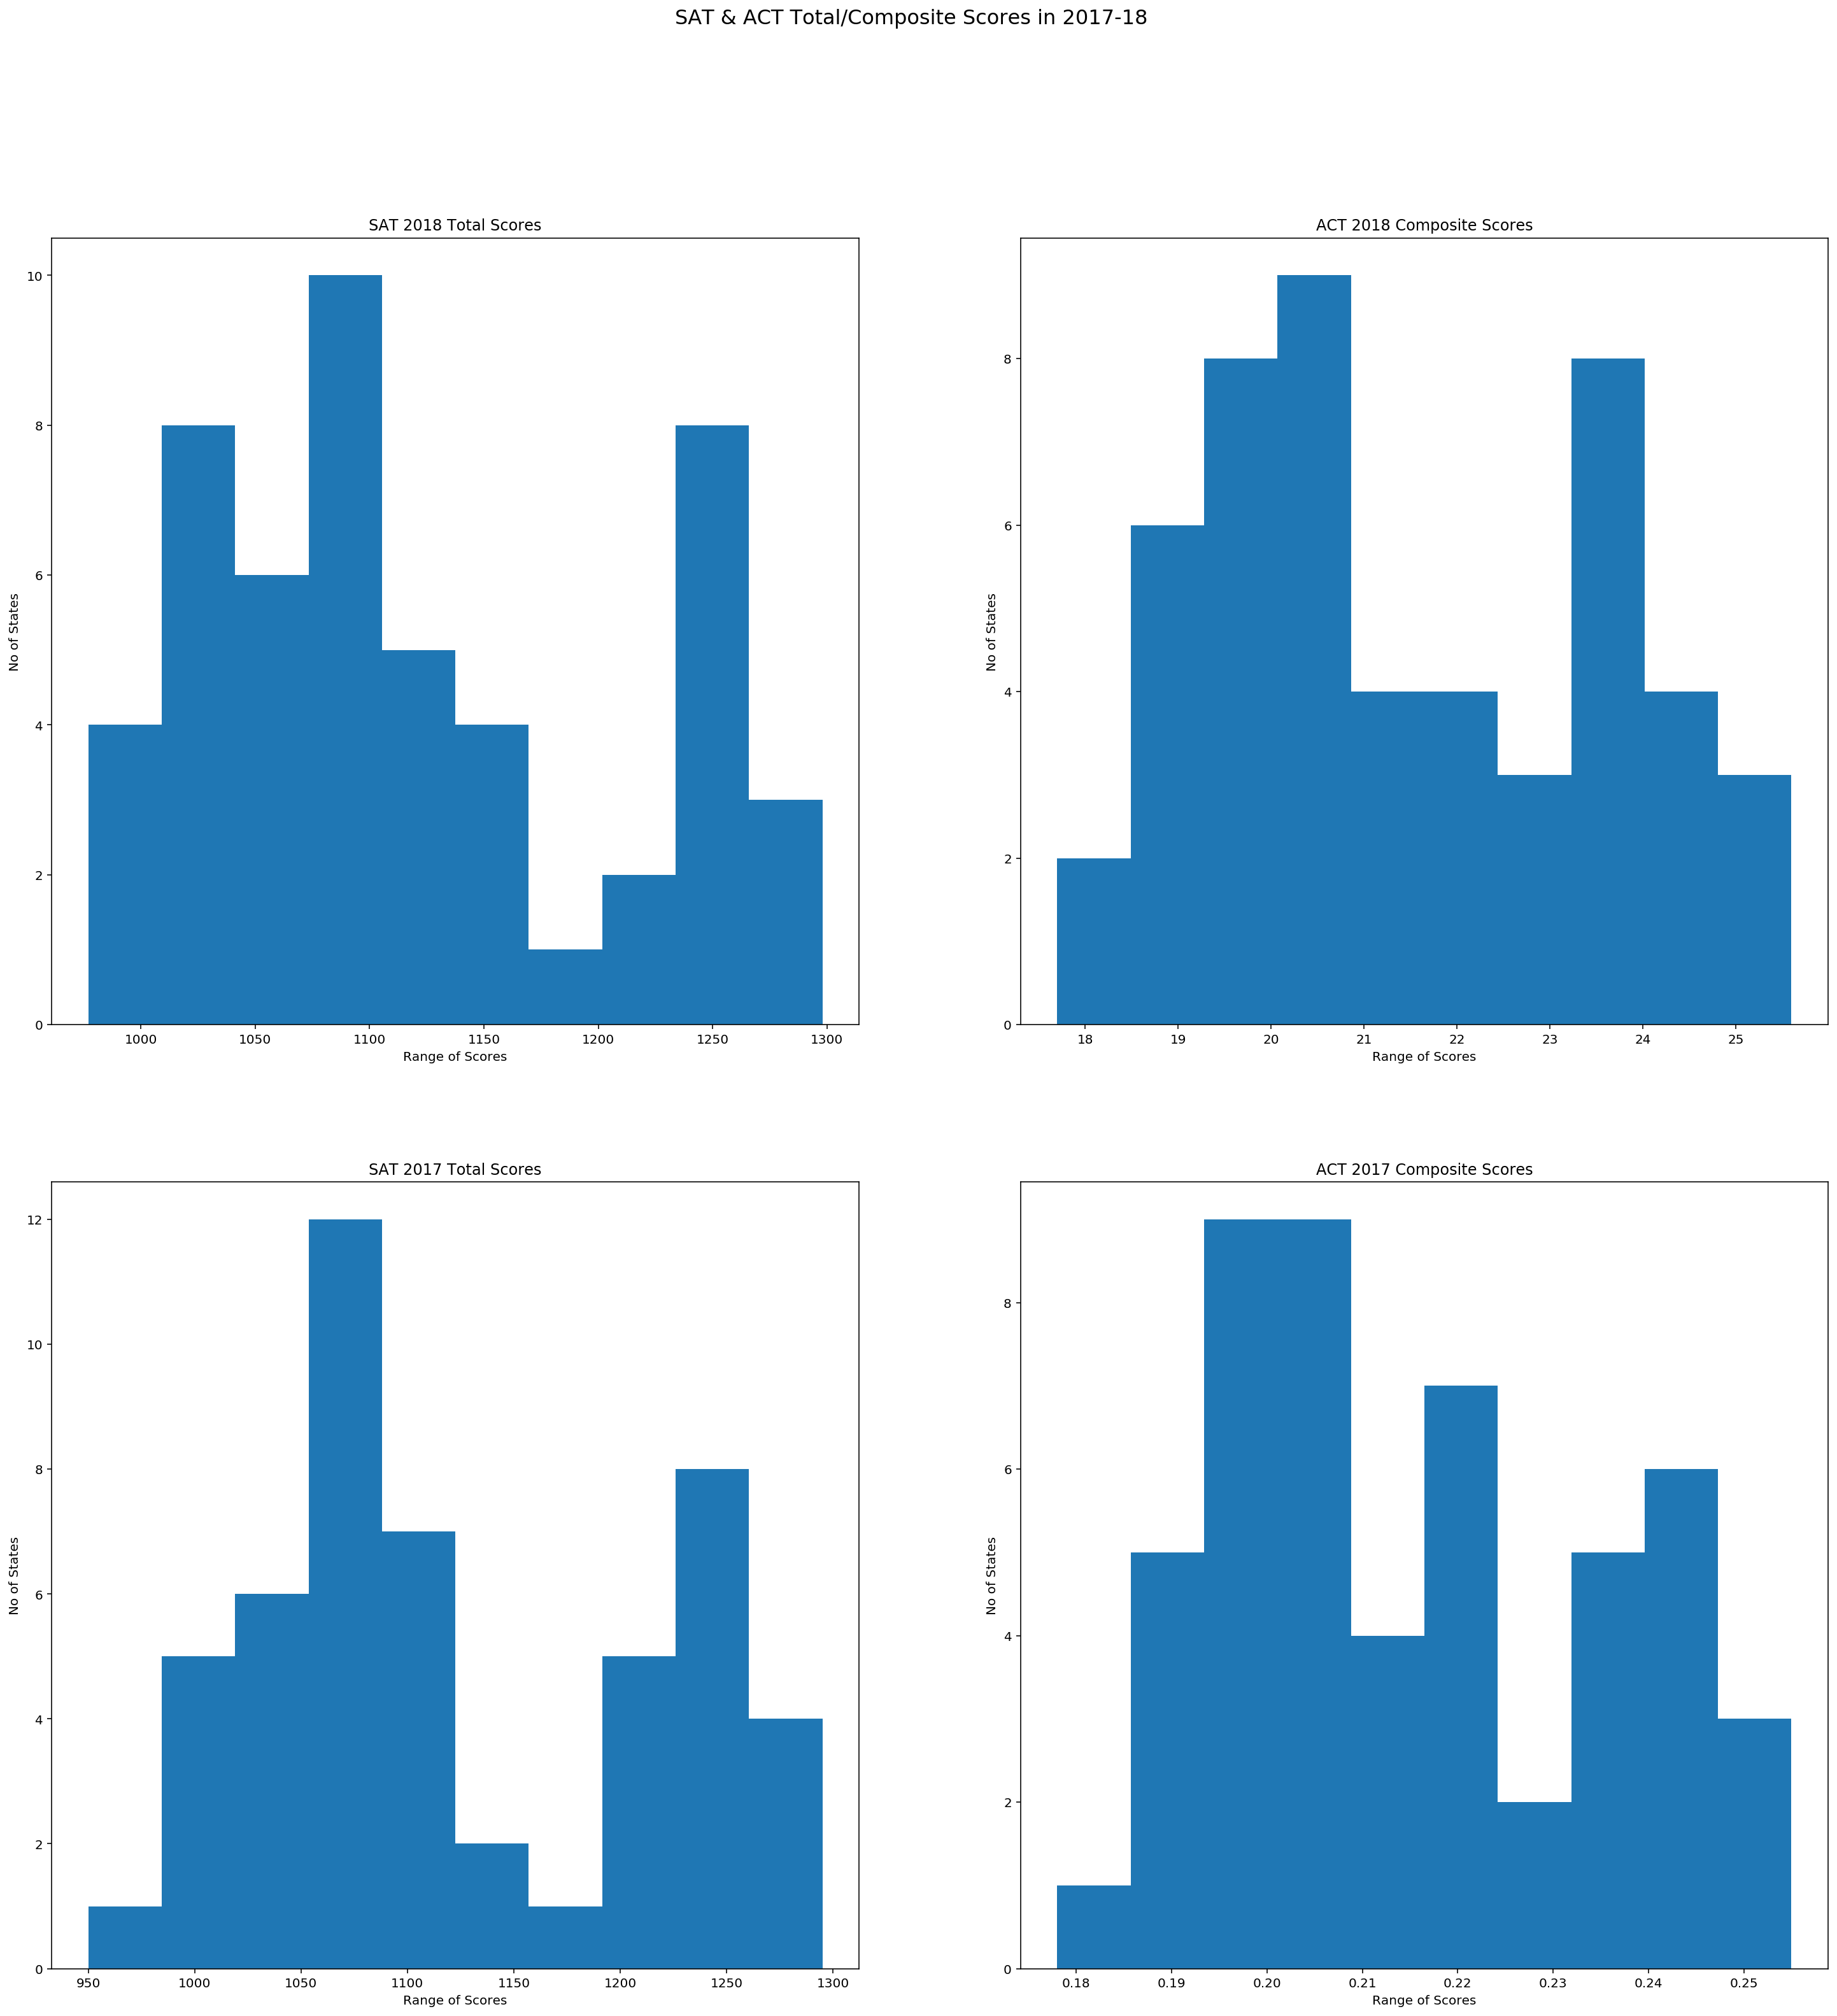

In [299]:
subplot_histograms(final,final_col, titles, "No of States","Range of Scores","SAT & ACT Total/Composite Scores in 2017-18")

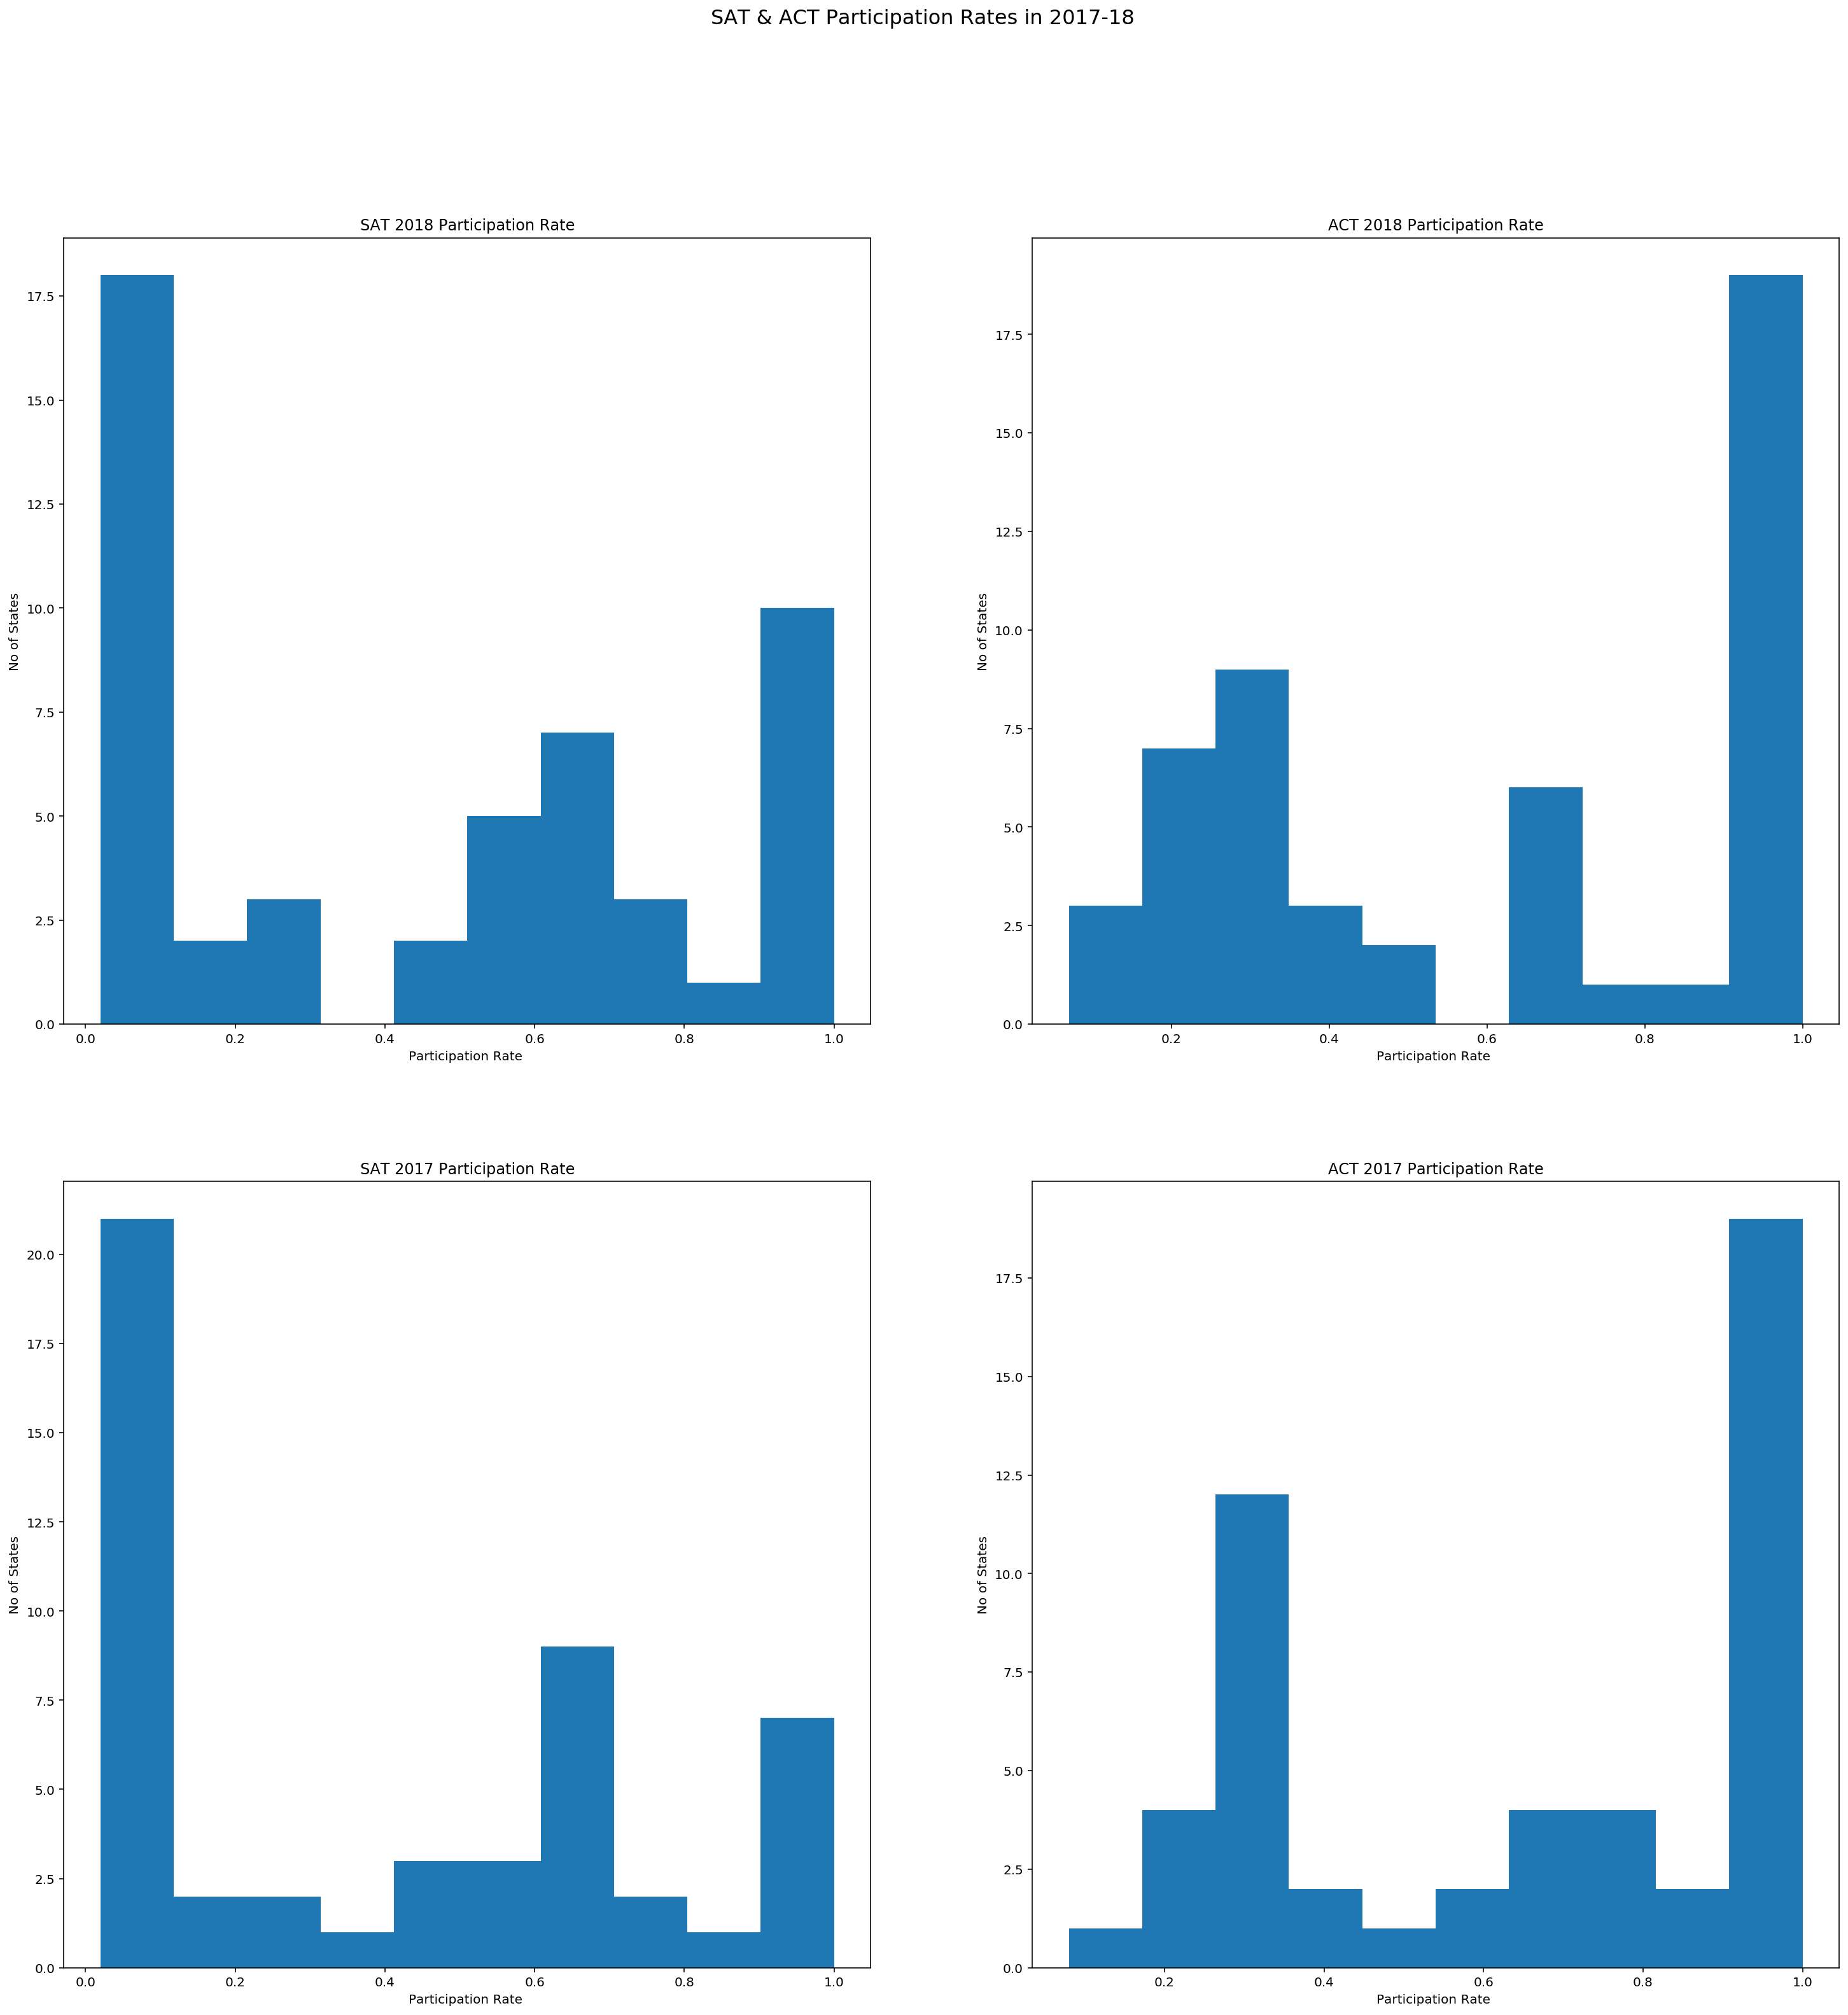

In [300]:
# Participation Rates for SAT & ACT in 2017-18

participation_col = ['sat_participation_18', 'act_participation_18', 'sat_participation_17', 'act_participation_17']
participation_titles = ['SAT 2018 Participation Rate', 'ACT 2018 Participation Rate', 'SAT 2017 Participation Rate', 'ACT 2017 Participation Rate']

subplot_histograms(final, participation_col, participation_titles, "No of States", "Participation Rate ", 'SAT & ACT Participation Rates in 2017-18')

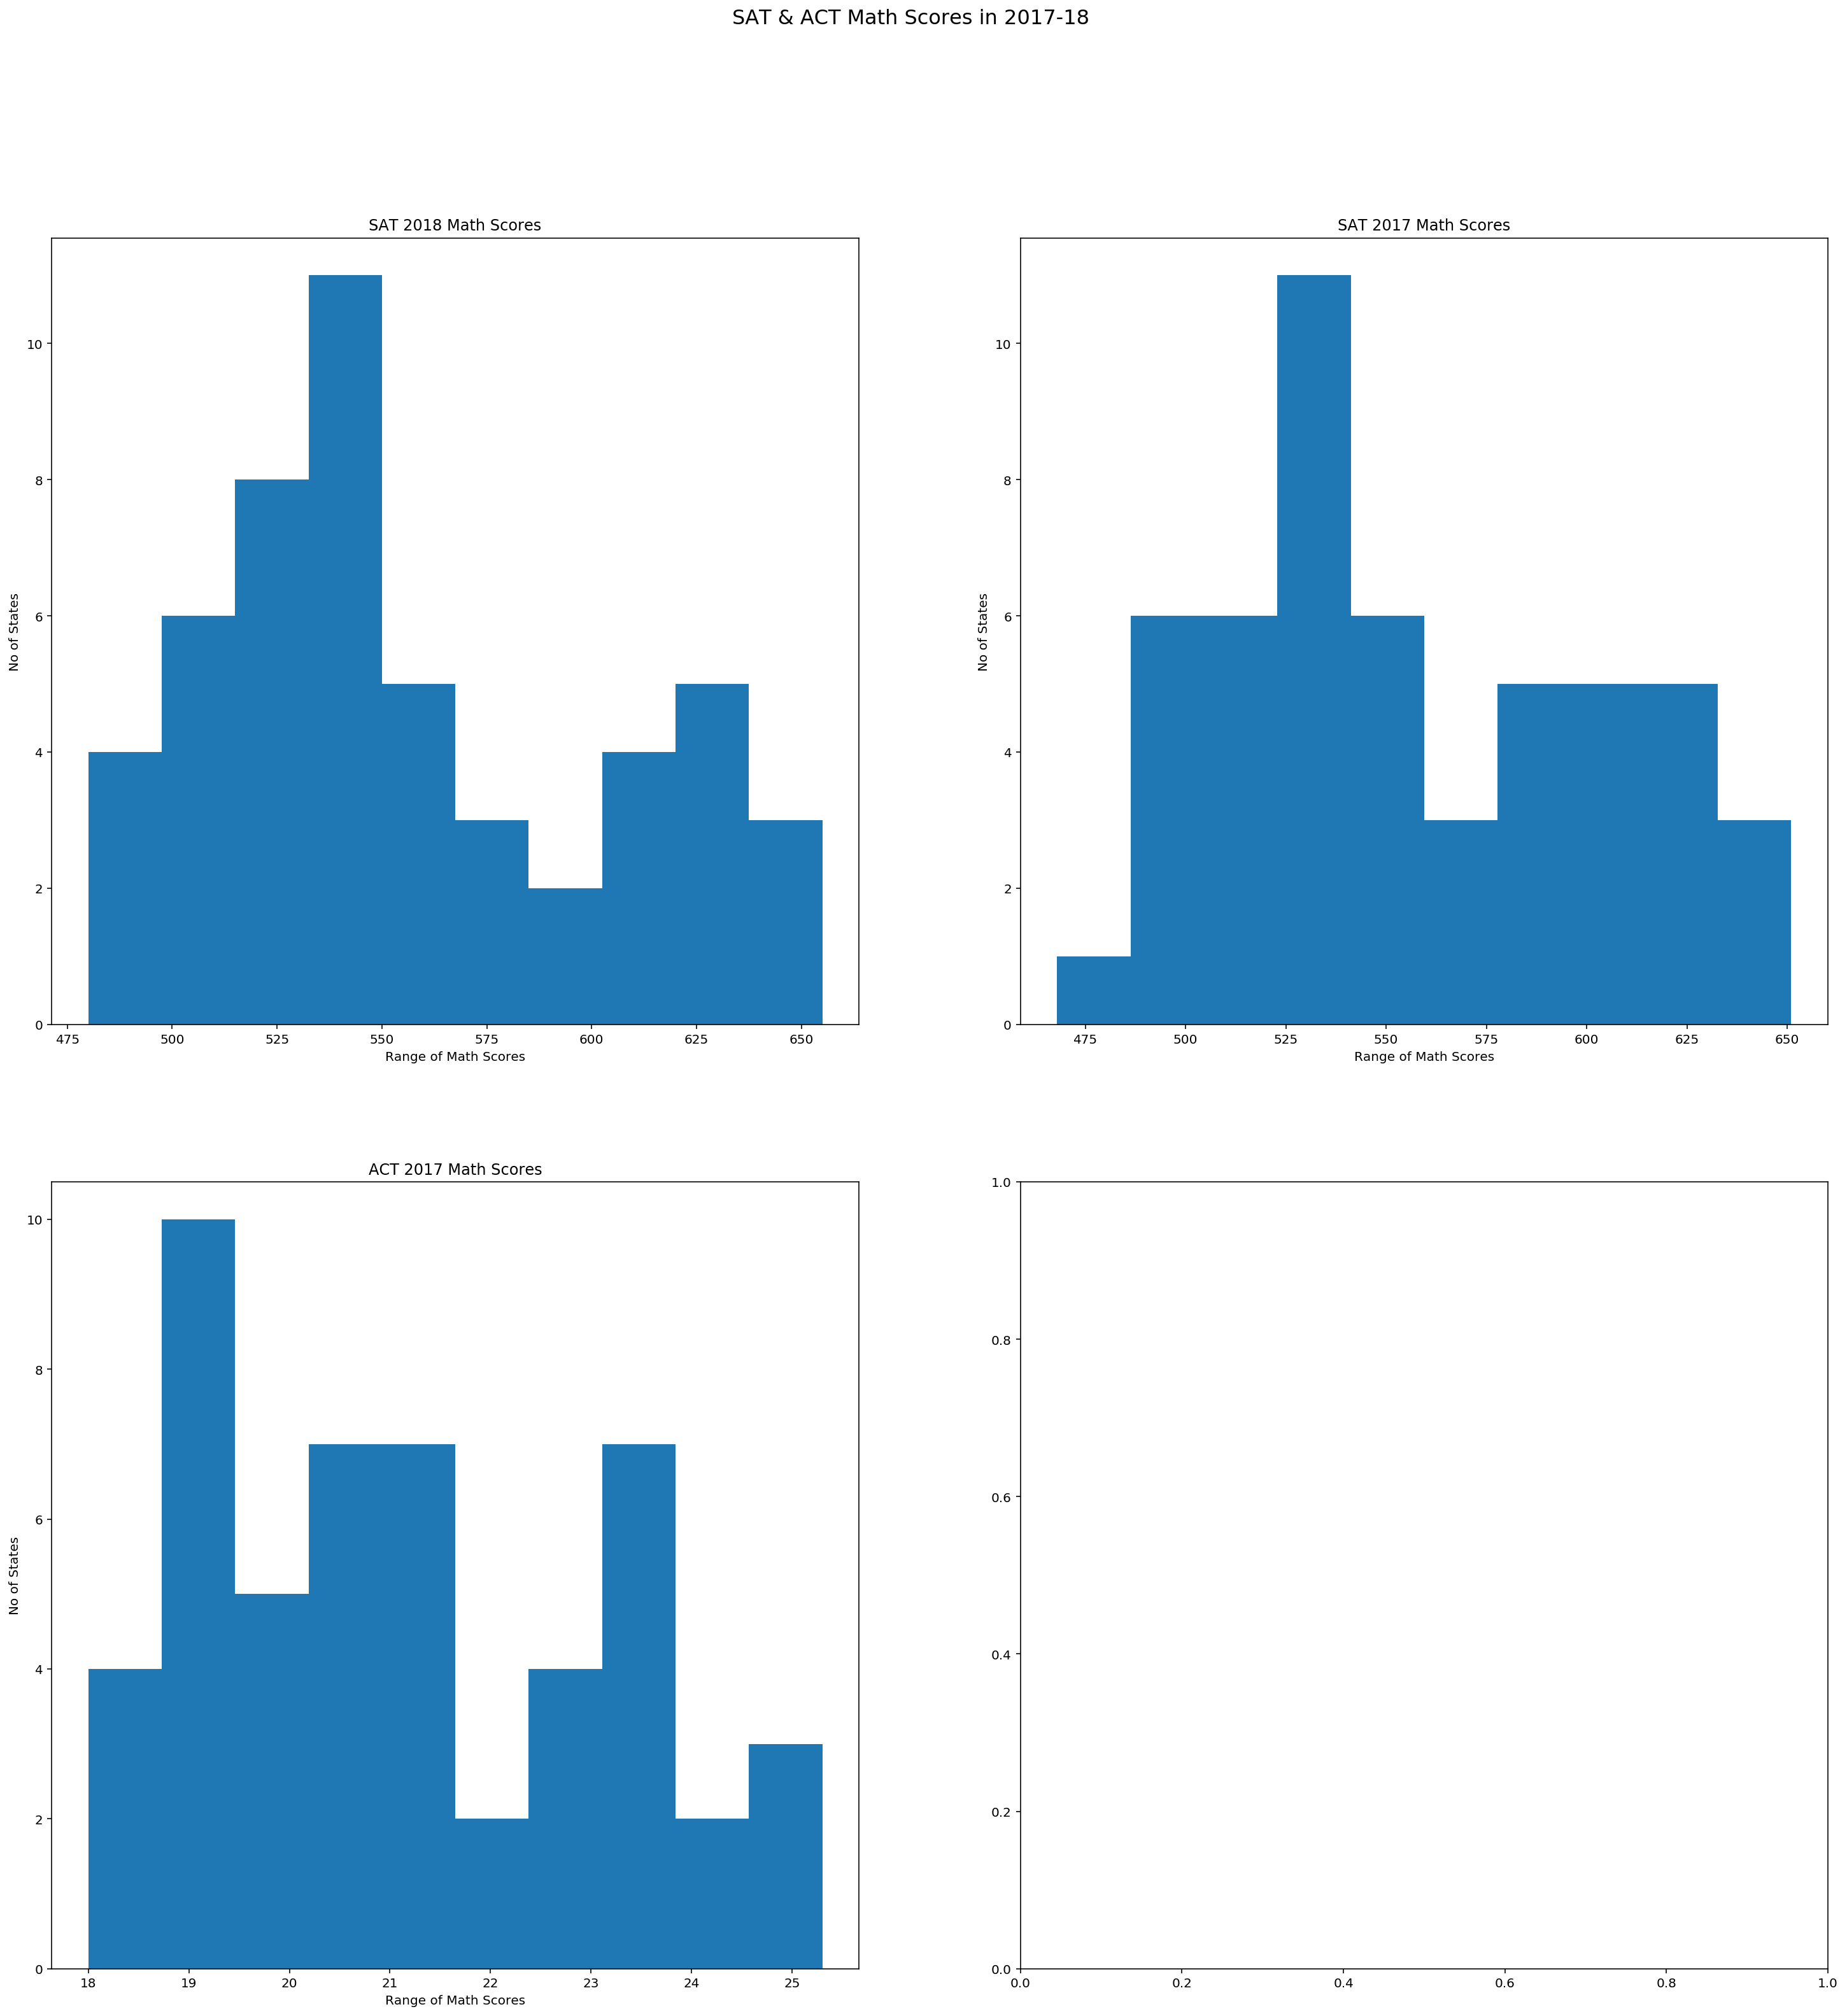

In [302]:
# Math scores for SAT & ACT in 2017-18

math_scores_col = ['sat_math_18', 'sat_math_17', 'act_math_17']
math_titles = ['SAT 2018 Math Scores', 'SAT 2017 Math Scores', 'ACT 2017 Math Scores']
subplot_histograms(final, math_scores_col, math_titles, "No of States", "Range of Math Scores", 'SAT & ACT Math Scores in 2017-18')


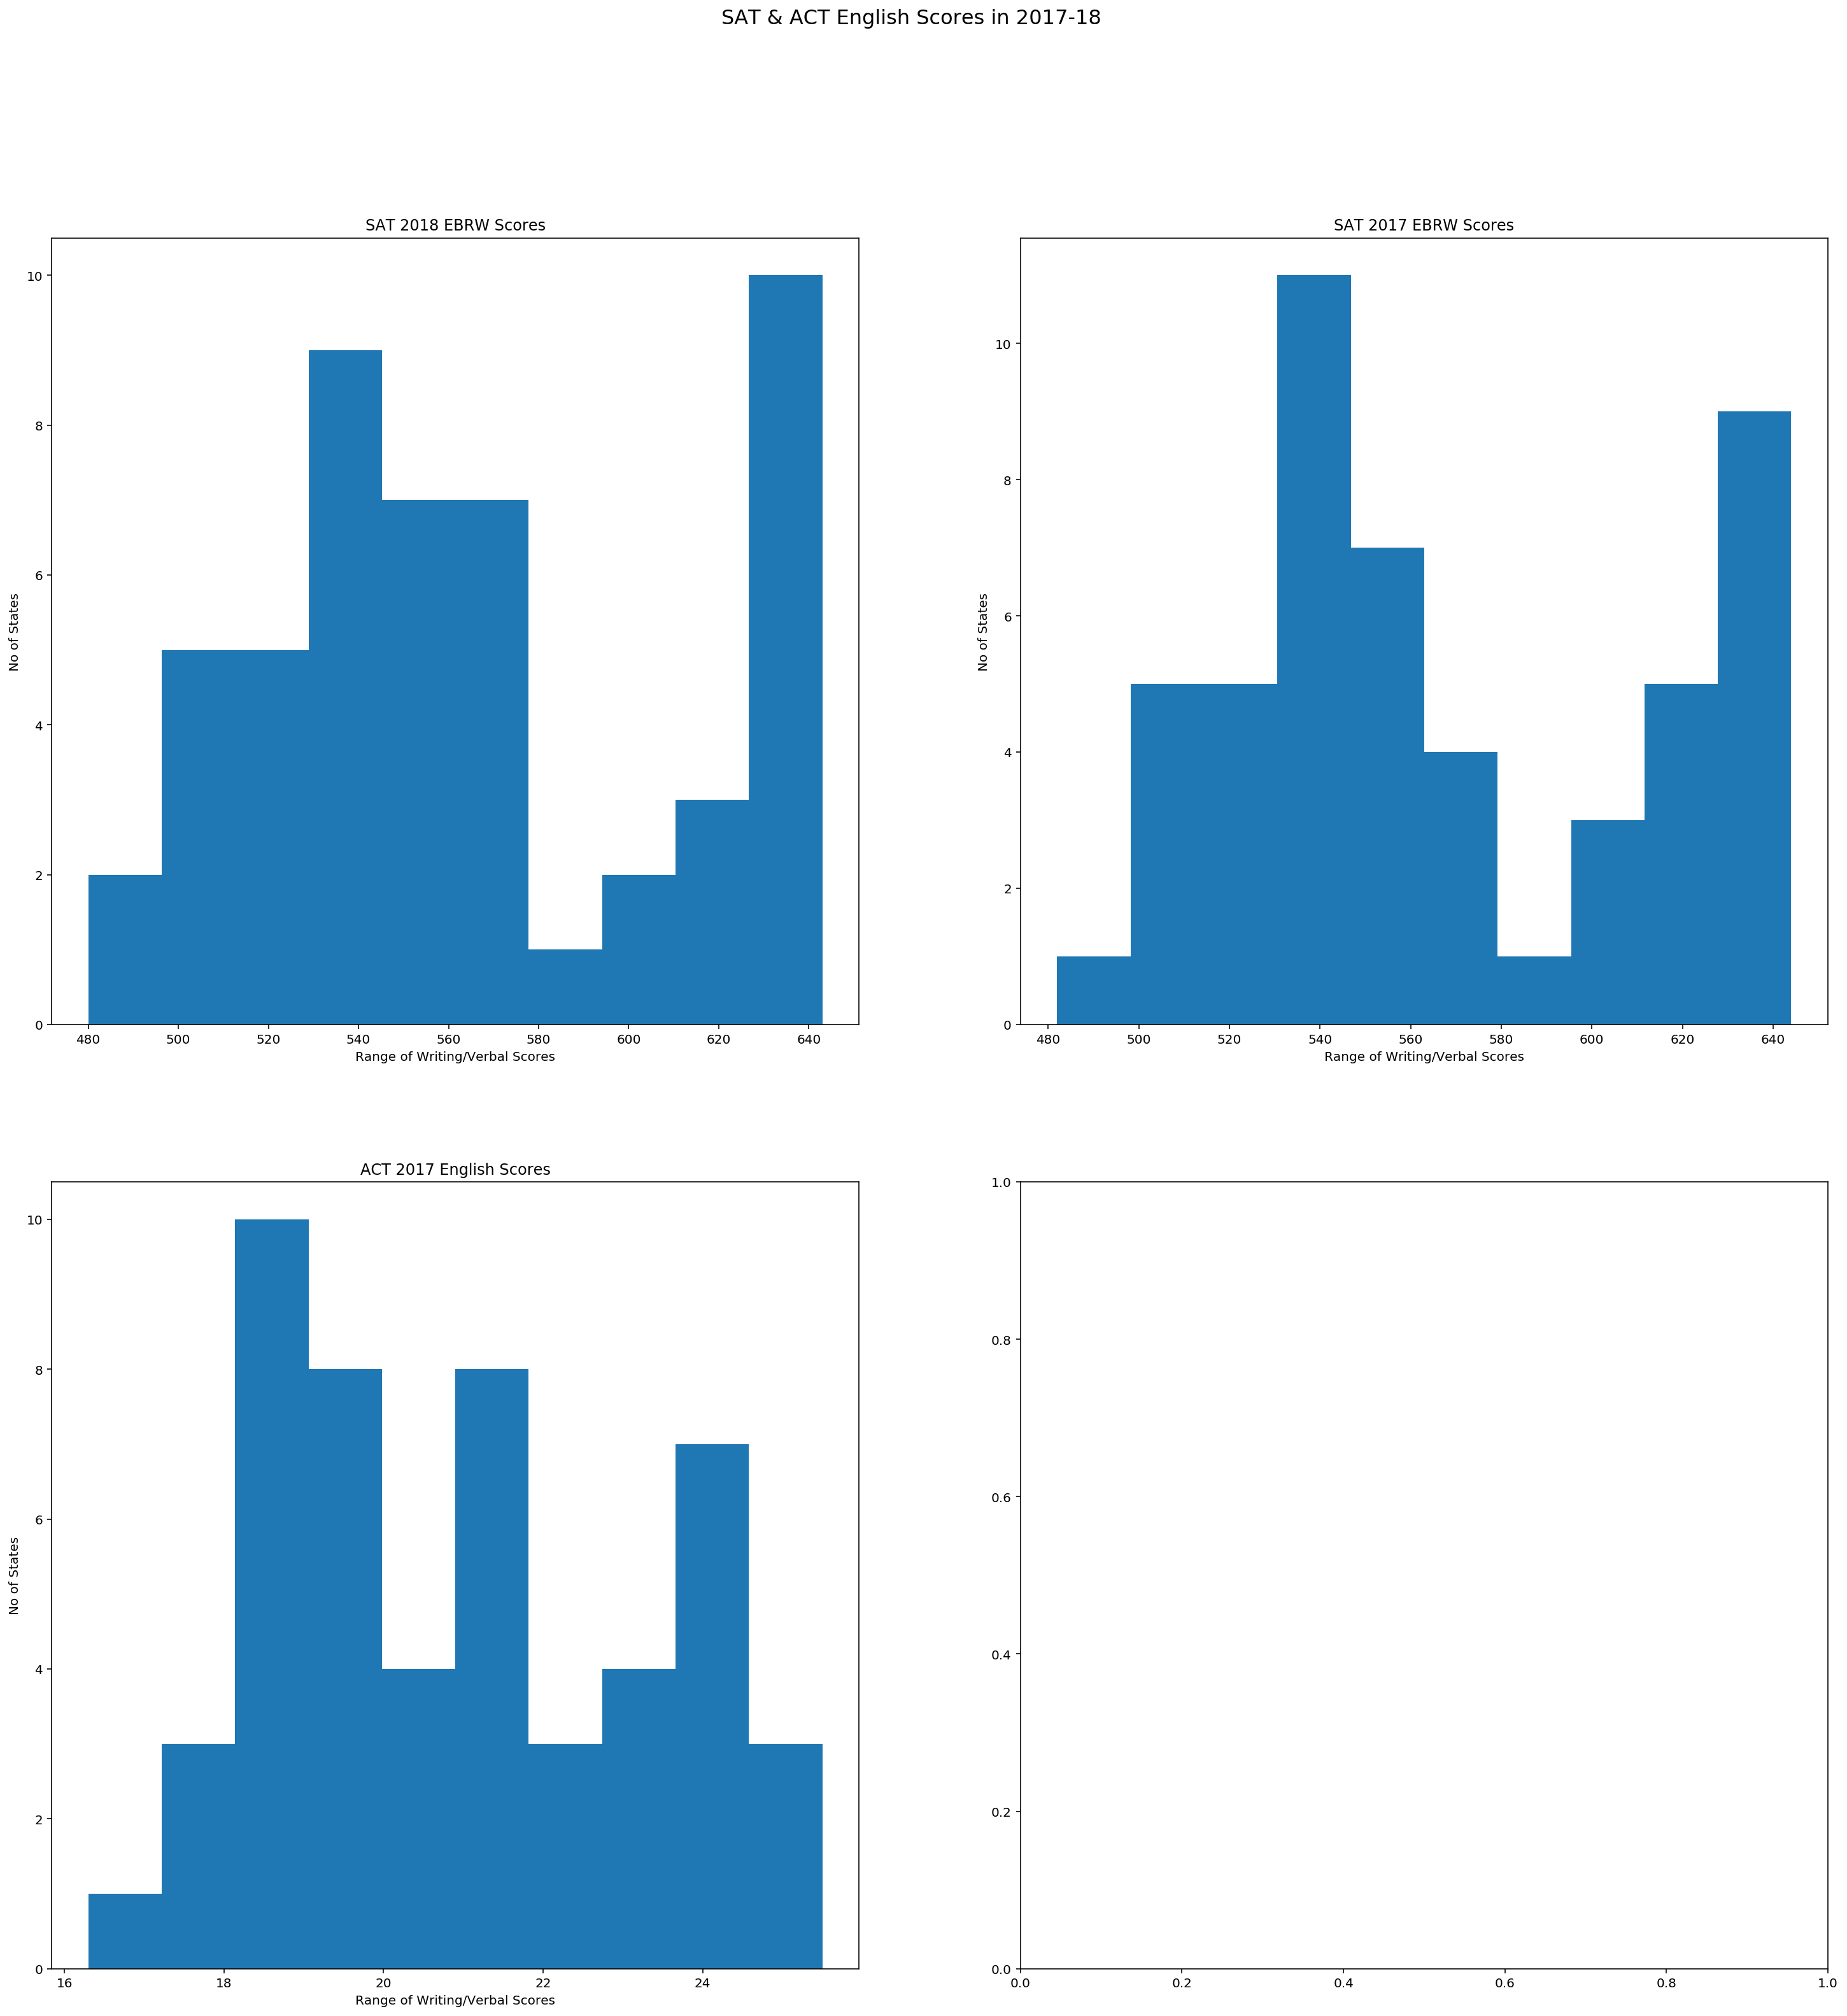

In [301]:
# Writing/Verbal scores for SAT & ACT in 2017-18

english_scores_col = ['sat_ebrw_18', 'sat_ebrw_17', 'act_english_17']
english_titles = ['SAT 2018 EBRW Scores', 'SAT 2017 EBRW Scores', 'ACT 2017 English Scores']

subplot_histograms(final, english_scores_col, english_titles,"No of States", "Range of Writing/Verbal Scores", 'SAT & ACT English Scores in 2017-18')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


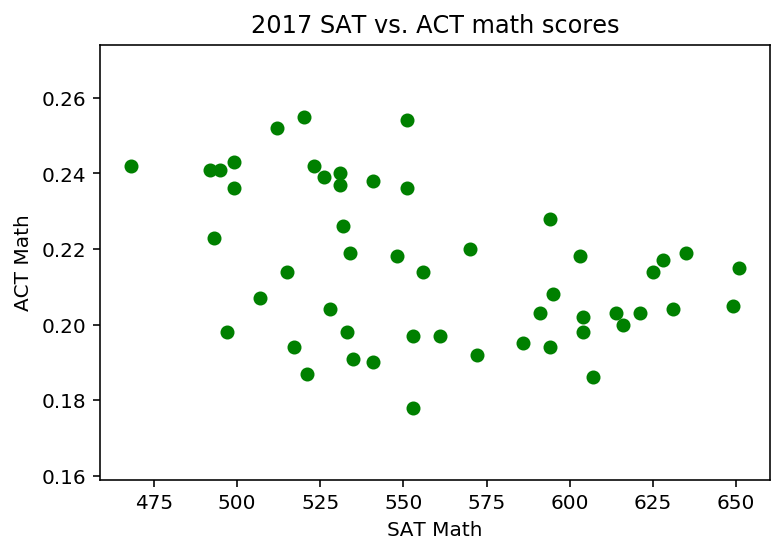

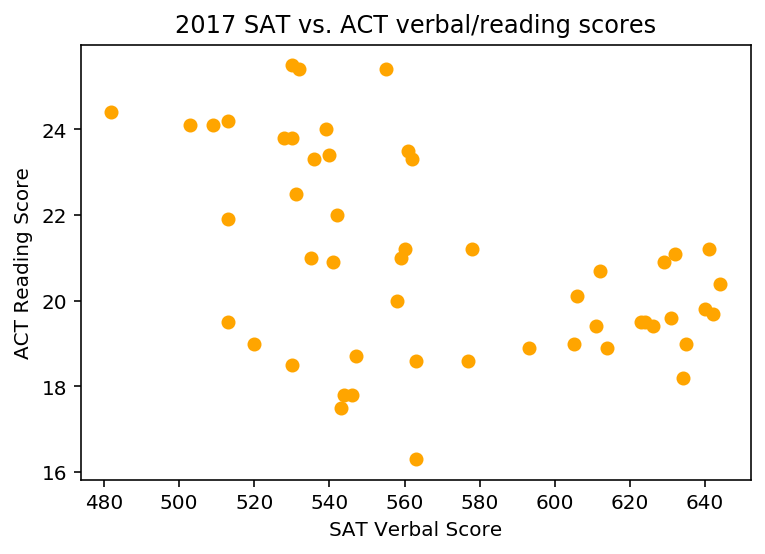

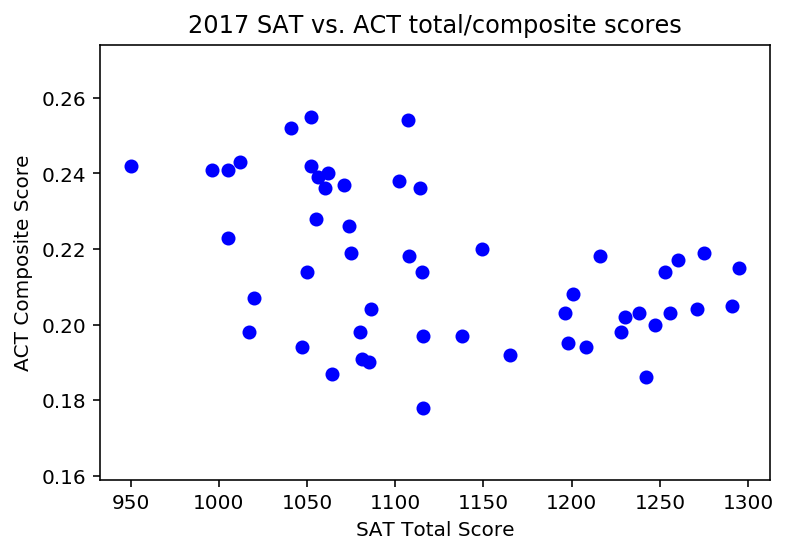

In [304]:
# Plot SAT vs. ACT math scores for 2017
plt.scatter(x = final['sat_math_17'],y = final['act_composite_17'], c ='green')
plt.title("2017 SAT vs. ACT math scores")
plt.xlabel('SAT Math')
plt.ylabel('ACT Math')
plt.show()

# Plot SAT vs. ACT verbal/reading scores for 2017
plt.scatter(x = final['sat_ebrw_17'],y = final['act_english_17'], c ='orange')
plt.title("2017 SAT vs. ACT verbal/reading scores")
plt.xlabel('SAT Verbal Score')
plt.ylabel('ACT Reading Score')
plt.show()

# Plot SAT vs. ACT total/composite scores for 2017
plt.scatter(x = final['sat_total_17'],y = final['act_composite_17'], c ='blue')
plt.title("2017 SAT vs. ACT total/composite scores")
plt.xlabel('SAT Total Score')
plt.ylabel('ACT Composite Score')
plt.show()


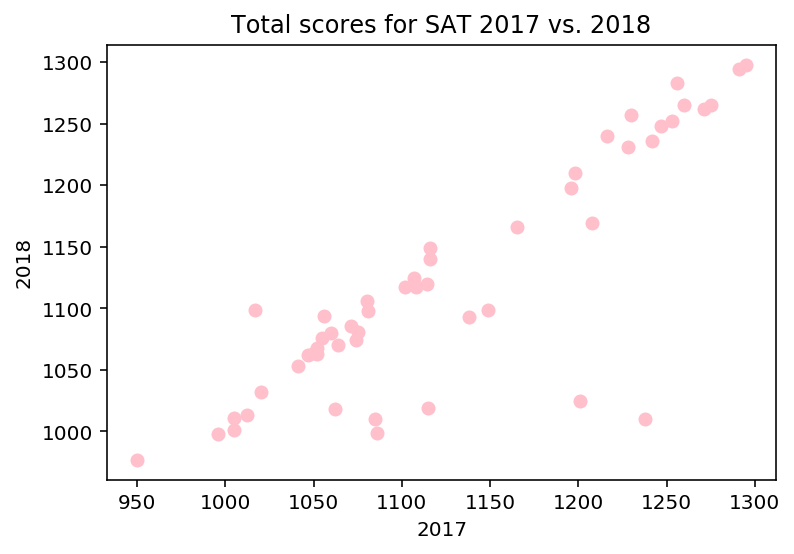

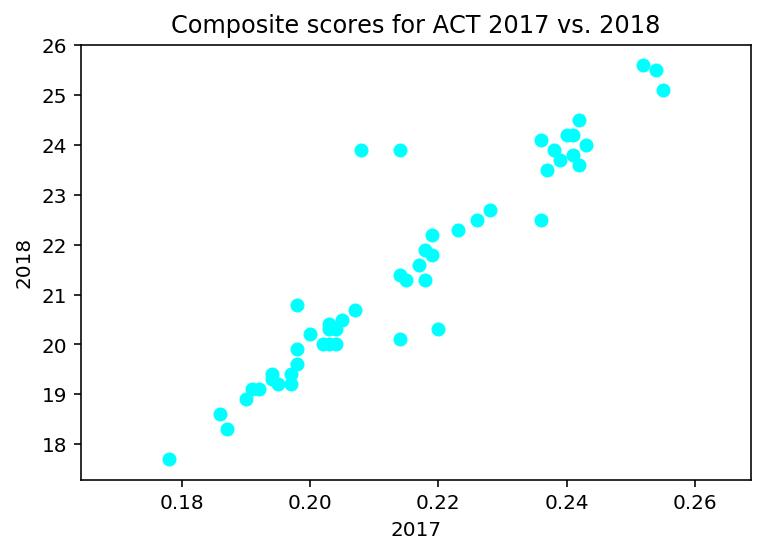

In [309]:
# Plot Total scores for SAT 2017 vs. 2018
plt.scatter(x = final['sat_total_17'],y = final['sat_total_18'], c ='pink')
plt.title("Total scores for SAT 2017 vs. 2018")
plt.xlabel('2017')
plt.ylabel('2018')
plt.show()
    
# Plot Composite scores for ACT 2017 vs. 2018
plt.scatter(x = final['act_composite_17'],y = final['act_composite_18'], c ='cyan')
plt.title("Composite scores for ACT 2017 vs. 2018")
plt.xlabel('2017')
plt.ylabel('2018')
plt.show()

SAT scores between 2017 and 2018 are highly positively correlated overall
- States that did well in 2017 tend to do the same in 2018 
- Some states showed some improvement from 2017 to 2018 (referring to outliers below the correlation line,

ACT scores between 2017 and 2018 are highly positively correlated overall
- States that did well in 2017 tend to do the same in 2018
- Some states showed some improvement and decline from 2017 to 2018 (referring to outliers below and above the correlation line respectively)

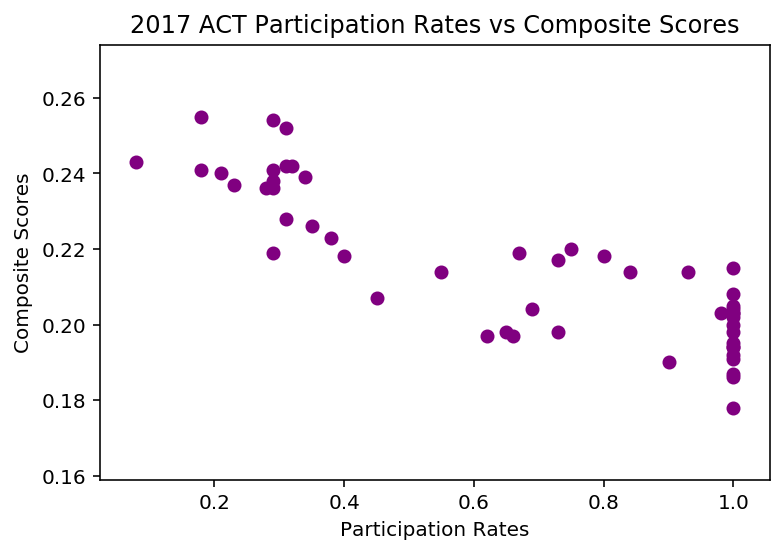

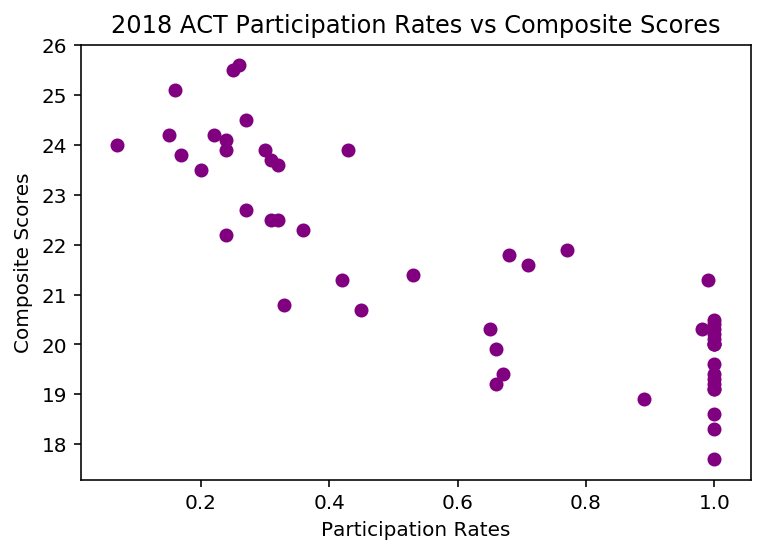

In [313]:
#Plot 2017 ACT Participation Rates vs Composite Scores
plt.scatter(x = final['act_participation_17'],y = final['act_composite_17'], c ='purple')
plt.title("2017 ACT Participation Rates vs Composite Scores")
plt.xlabel('Participation Rates')
plt.ylabel('Composite Scores')
plt.show()

# Plot 2018 ACT Participation Rates vs Composite Scores
plt.scatter(x = final['act_participation_18'],y = final['act_composite_18'], c ='purple')
plt.title("2018 ACT Participation Rates vs Composite Scores")
plt.xlabel('Participation Rates')
plt.ylabel('Composite Scores')
plt.show()

It can be observed that there is a negative correlation between the ACT Participant Rates and Composite Scores

Higher composite scores are evident at states with lower participation rates 

Lower composite scores are evident at states with highter participation rates

More states have 100 % Participation for ACT test as compared to SAT test"


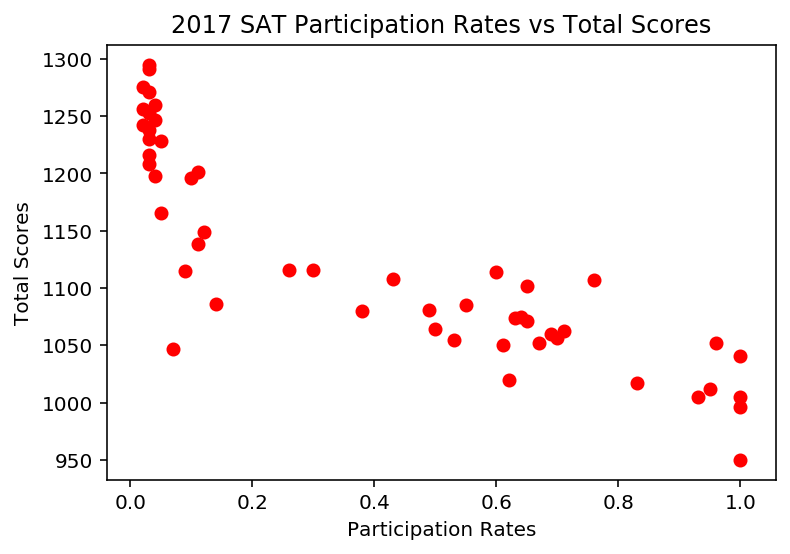

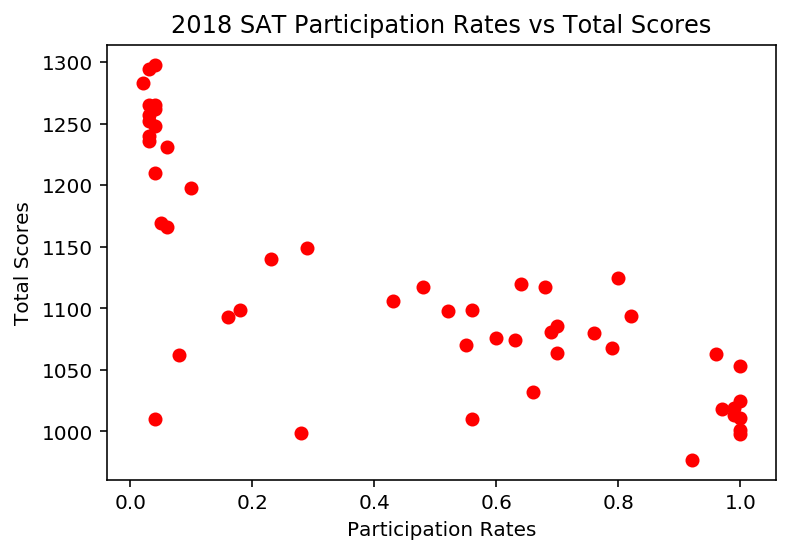

In [318]:
#Plot 2017 SAT Participation Rates vs Total Scores
plt.scatter(x = final['sat_participation_17'],y = final['sat_total_17'], c ='red')
plt.title("2017 SAT Participation Rates vs Total Scores")
plt.xlabel('Participation Rates')
plt.ylabel('Total Scores')
plt.show()

#Plot 2018 SAT Participation Rates vs Total Scores
plt.scatter(x = final['sat_participation_18'],y = final['sat_total_18'], c ='red')
plt.title("2018 SAT Participation Rates vs Total Scores")
plt.xlabel('Participation Rates')
plt.ylabel('Total Scores')
plt.show()


It can be observed that there is a negative correlation between the SAT Participant Rates and Total Scores

Higher composite scores are evident at states with lower participation rates

Lower composite scores are evident at states with highter participation rates

More states have 100 % Participation for ACT test as compared to SAT test"


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

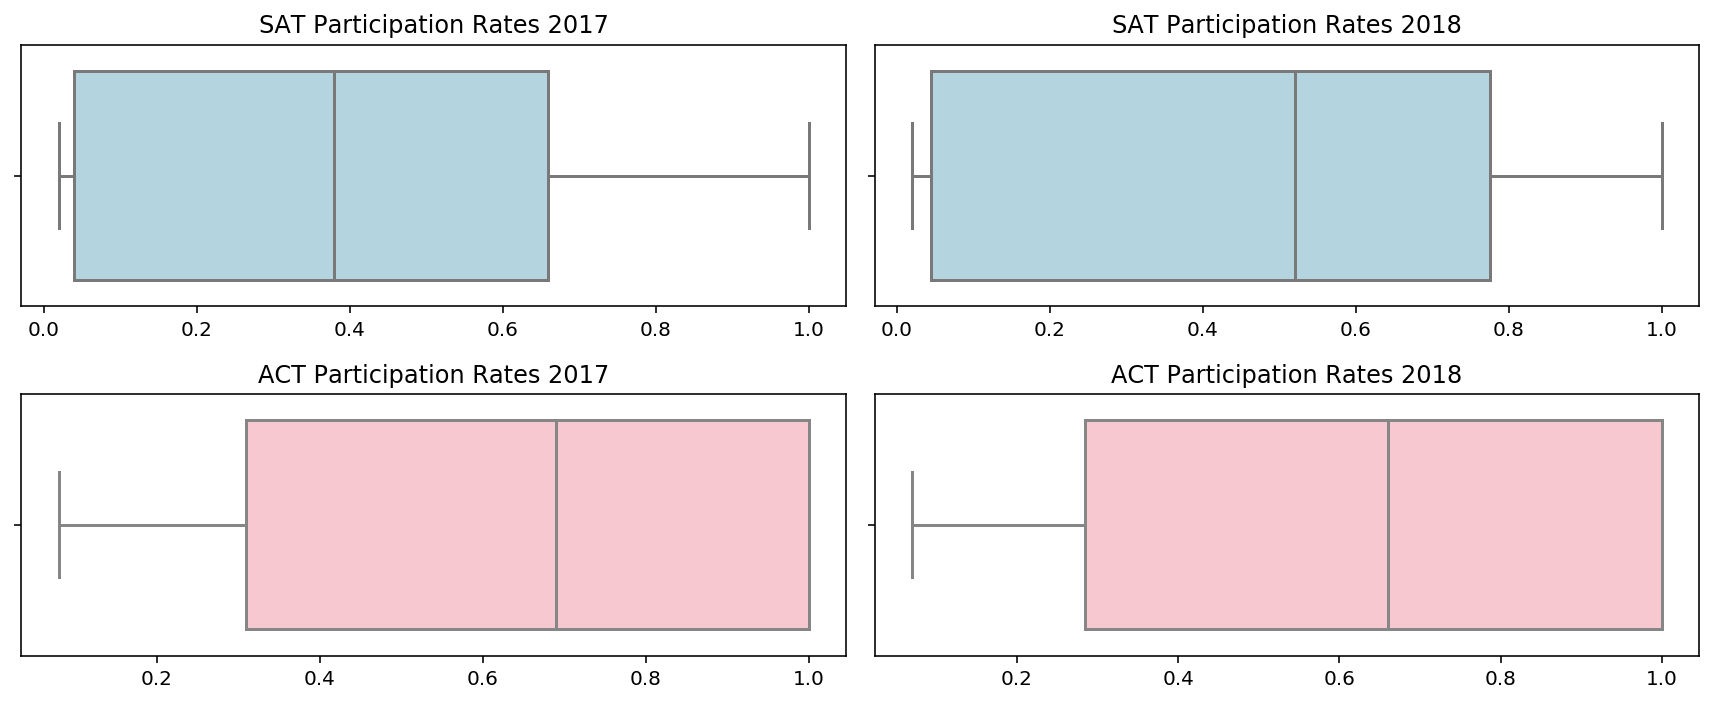

In [321]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,5))

sns.boxplot(final.sat_participation_17, ax = ax[0,0], orient="h", color = 'lightblue').set(xlabel='', title='SAT Participation Rates 2017')

sns.boxplot(final.sat_participation_18, ax = ax[0,1], orient="h", color = 'lightblue').set(xlabel='', title='SAT Participation Rates 2018')

sns.boxplot(final.act_participation_17, ax = ax[1,0], orient="h", color = 'pink').set(xlabel='', title='ACT Participation Rates 2017')

sns.boxplot(final.act_participation_18, ax = ax[1,1], orient="h", color = 'pink').set(xlabel='', title='ACT Participation Rates 2018')

plt.tight_layout()

(Text(0.5, 1.0, 'SAT Math & EBRW 2017 vs. 2018'),
 Text(0.5, 0, 'SAT Math and EBRW Scores'))

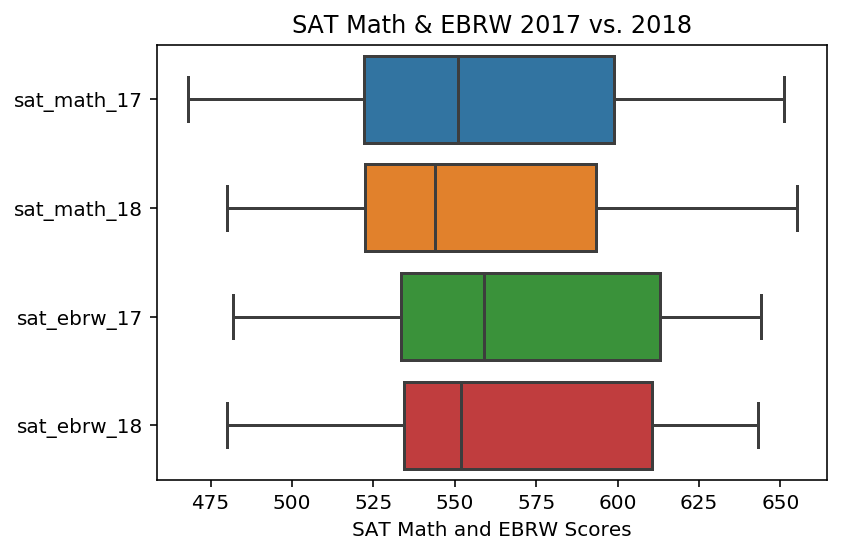

In [325]:
# SAT Math & EBRW for 2017 and 2018

sns.boxplot(data=final[['sat_math_17', 'sat_math_18', 'sat_ebrw_17', 'sat_ebrw_18']],orient='h').set_title('SAT Math & EBRW 2017 vs. 2018'), plt.xlabel('SAT Math and EBRW Scores')


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

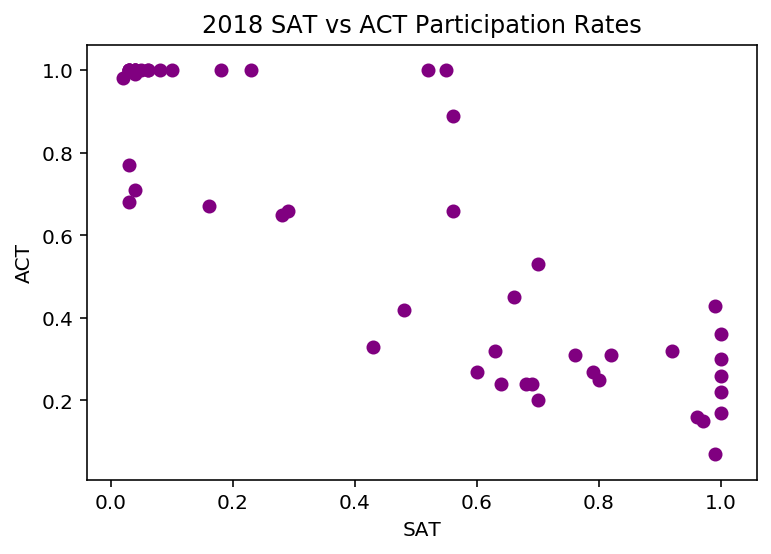

In [326]:
#Plot 2018 SAT vs ACT Participation Rates
plt.scatter(x = final['sat_participation_18'],y = final['act_participation_18'], c ='purple')
plt.title("2018 SAT vs ACT Participation Rates")
plt.xlabel('SAT')
plt.ylabel('ACT')
plt.show()

States that have 100% participation for either SAT or ACT test tend to have very minimal or 0% participation for ACT or SAT test respectively
The trend does seem to be consistent in both 2017 and 2018 with minimal variations.



#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

<div>
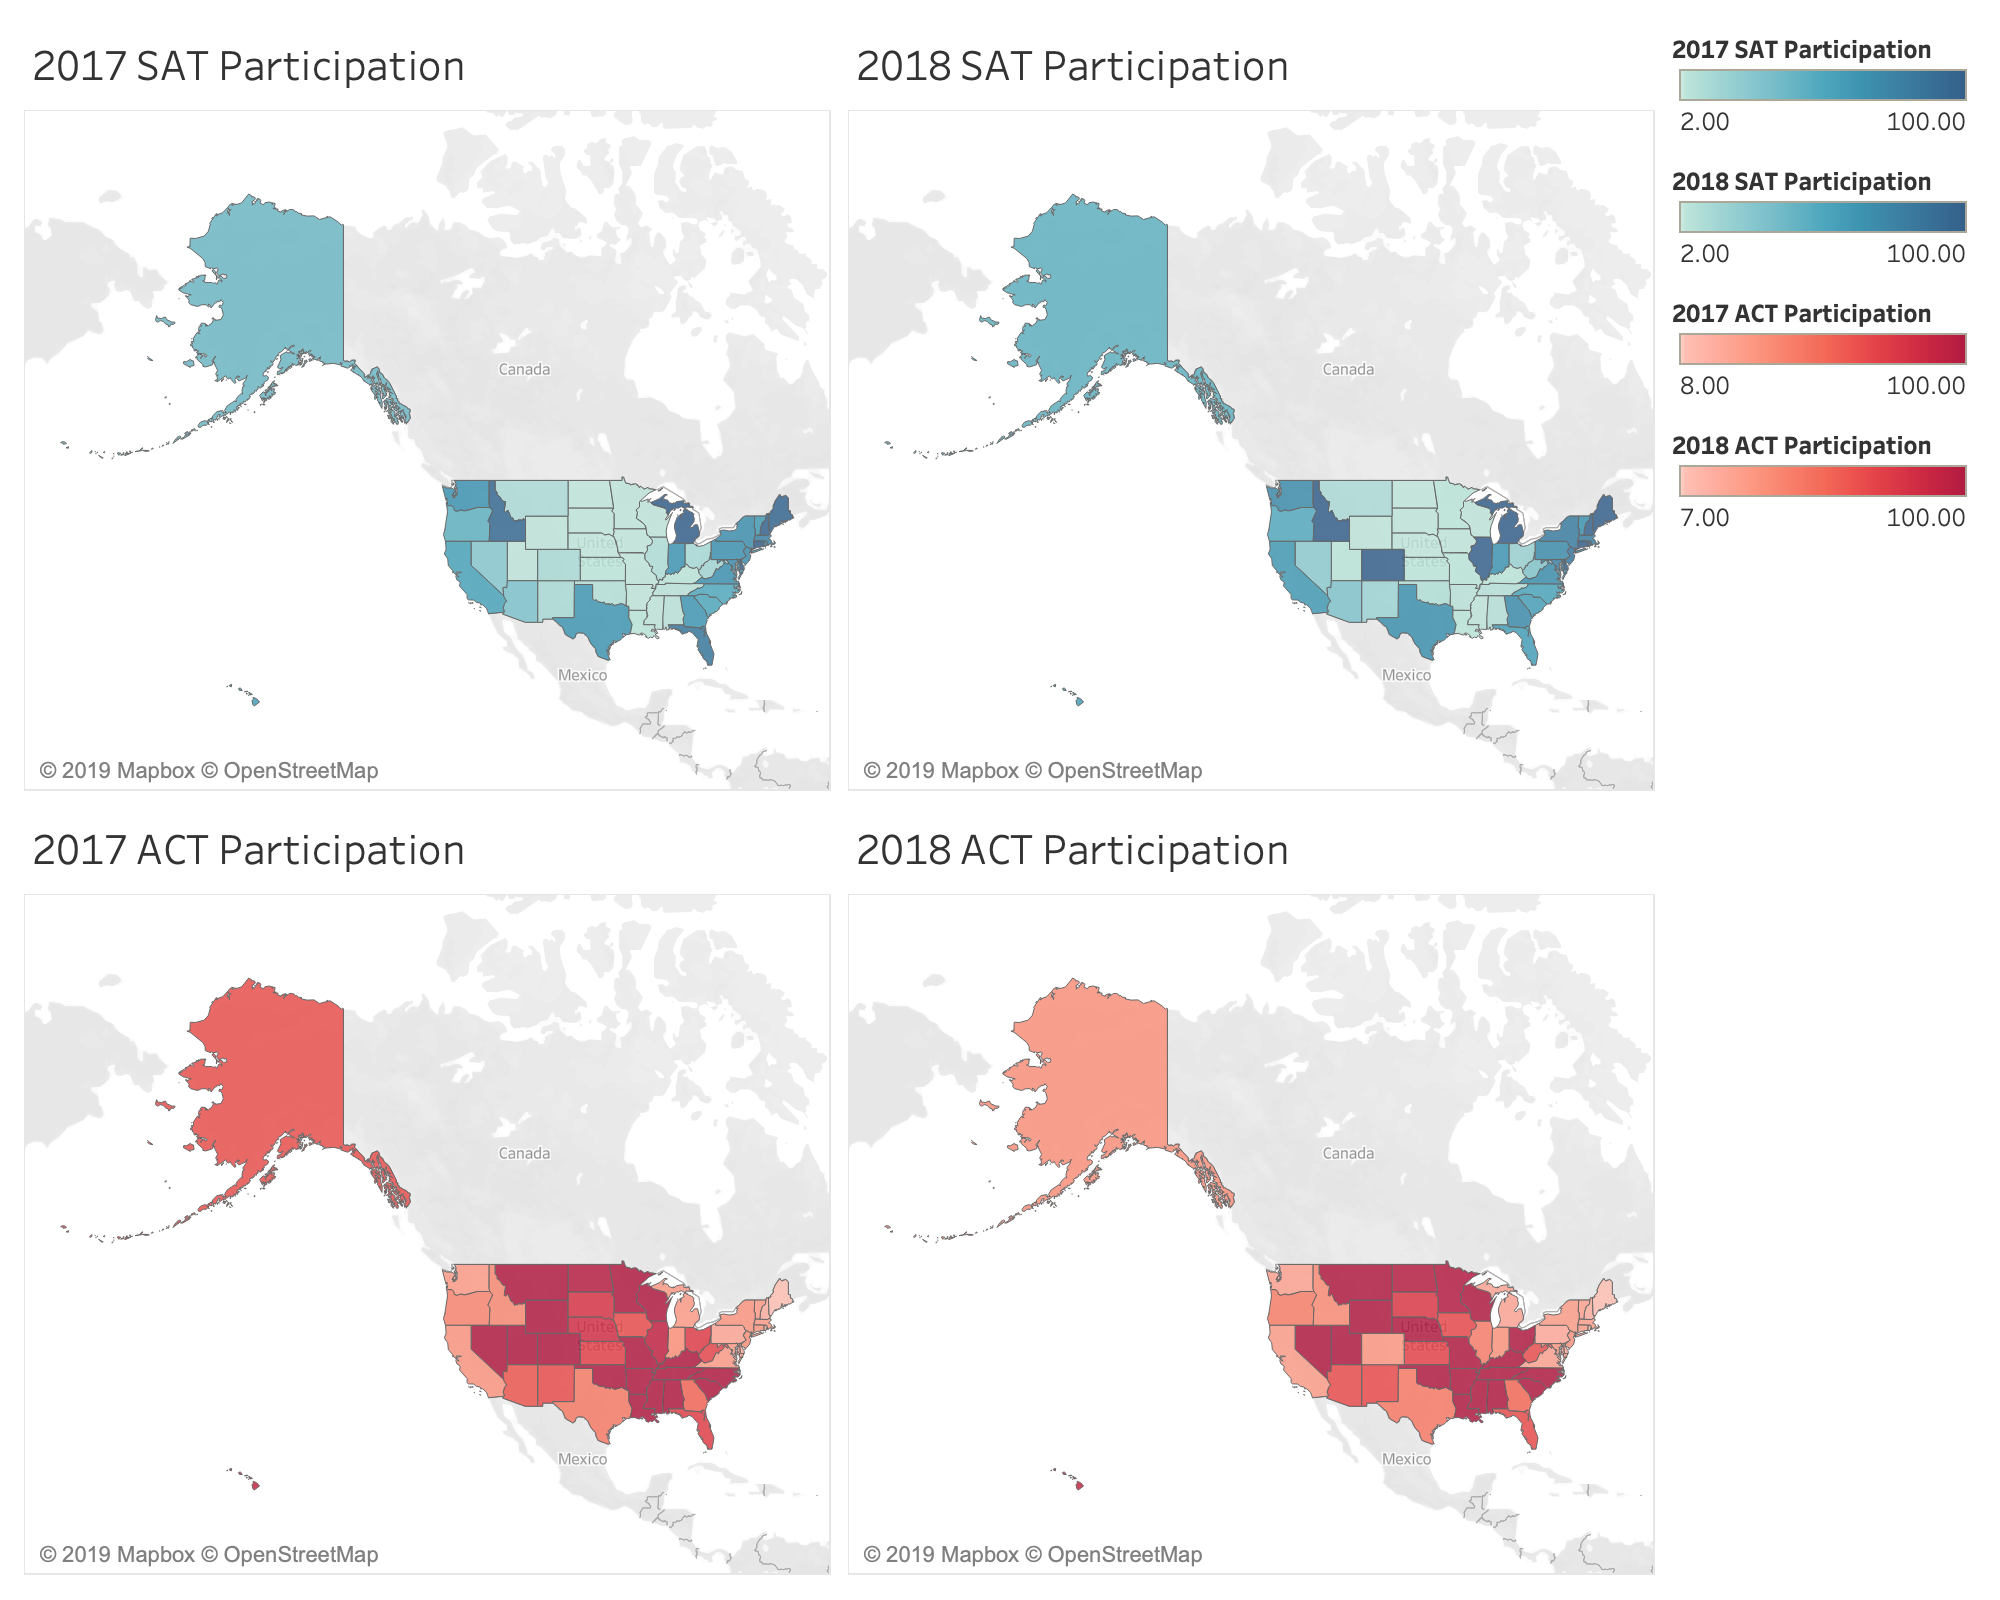
</div>



## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [490]:
import scipy.stats as stats
def norm_dist(df,col):
    ct = df[col].describe()['count']
    mean = df[col].describe()['mean']
    std = df[col].describe()['std']
    skew = stats.skew(df[col])
    dis_skew = 6*(ct-1)/((ct+1)*(ct+3))
    kurtosis = stats.kurtosis(df[col])
    dis_kurtosis = 24*(ct-2)*(ct-3)*ct/((ct+3)*(ct+5)*(ct-1)**2)
    norm_dist = (np.abs(skew)<=np.sqrt(dis_skew)) and (np.abs(kurtosis)<=np.sqrt(dis_kurtosis))
    print('{} : {}normally distributed\nmean {:.2f}, std {:.2f}, skew {:.2f}\n'
          .format(col, '' if norm_dist else 'NOT ',mean,std,skew))
          
for i in final.columns[1:]:
    norm_dist(final,i)

act_participation_17 : NOT normally distributed
mean 0.65, std 0.32, skew -0.19

act_english_17 : NOT normally distributed
mean 20.93, std 2.35, skew 0.34

act_math_17 : NOT normally distributed
mean 21.18, std 1.98, skew 0.32

act_reading_17 : NOT normally distributed
mean 22.01, std 2.07, skew 0.26

act_science_17 : NOT normally distributed
mean 21.04, std 3.18, skew -3.98

act_composite_17 : NOT normally distributed
mean 0.22, std 0.02, skew 0.31

sat_participation_17 : NOT normally distributed
mean 0.40, std 0.35, skew 0.34

sat_ebrw_17 : NOT normally distributed
mean 569.12, std 45.67, skew 0.26

sat_math_17 : NOT normally distributed
mean 557.90, std 47.57, skew 0.27

sat_total_17 : NOT normally distributed
mean 1126.10, std 92.49, skew 0.30

act_participation_18 : NOT normally distributed
mean 0.62, std 0.34, skew -0.03

act_composite_18 : NOT normally distributed
mean 21.50, std 2.11, skew 0.26

sat_participation_18 : NOT normally distributed
mean 0.46, std 0.37, skew 0.13

sat

The assumption doesn't hold for:
- Math
- Reading
- Participation Rates
as there are not normally distributed 


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

It does not make sense to conduct statistical inference given these data specifically. The datasets for both tests provides data for all students in all states (and DC). Therefore, we are analyzing a population and not a sample. Statistical inference is conducted only when the data is a sampling of the population.

But we could still obtain the statitical inference to get an overview correlation between SAT and ACT Participation 

In [346]:
final.corr()['act_participation_17']['sat_participation_17']

-0.8412344644539915

Other than finding out the correlation (high negative value = -0.84) of the SAT and ACT participation rates 2017 which loosely mean that high participation rate in SAT will in turn have low participation rate and vice versa.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

We could find out the overview correlating relationship that SAT and ACT math scores have but it is not recommended for specfic values as both tests are scored very differently.

In [362]:
final.corr()['act_math_17']['sat_math_17']

-0.4010210457678856

Mid-range negative correlation of -0.401

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

More than 2.1 million students in the class of 2018 took the redesigned SAT resulting in an increase of 25% over the class of 2017, according to the 2018 SAT Suite of Assessments Program Results. This is the largest number of students in a graduating class to take the SAT. 

Though this achievement does seems to be attractive at a face value, it is crucial to note that there is a negative correlation participation rates and test scores. This translates to the higher the participation rate, the lower the average total test score. Considering that high SAT scores are demanded for college admissions, this is a worrying issue.

It is important to address College Board current stand in believing that students are gaining greater access and opportunity as more students take SATs where in reality the more widely their test is offered, the higher the chances are of more students performing poorly. 

One notable example is Washington, DC, where students had one of the highest participation rates of all states in 2017 - 2018, but earned the lowest test scores. Conversely, Minnesota had participation rates in the bottom 10 in 2017-18, but earned the highest test scores. 

Taking a closer look at test scores, it was evident that the more students who performed poorly than well. If College Board wants to promote SAT as a significant contributor into getting to college, the SAT itself is currently hindering students' access to college.

Citation:
https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever

<div>
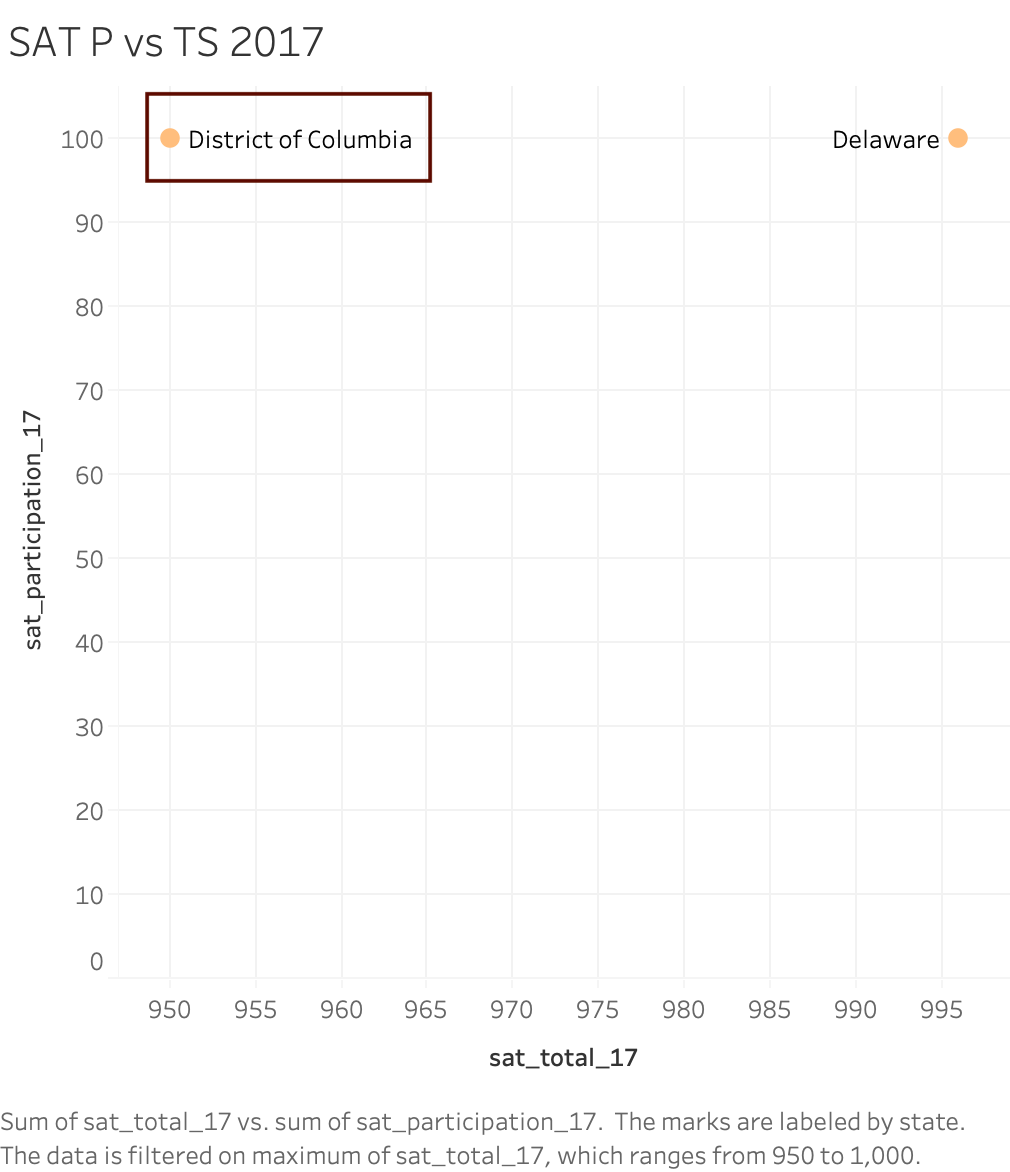
</div>

<div>
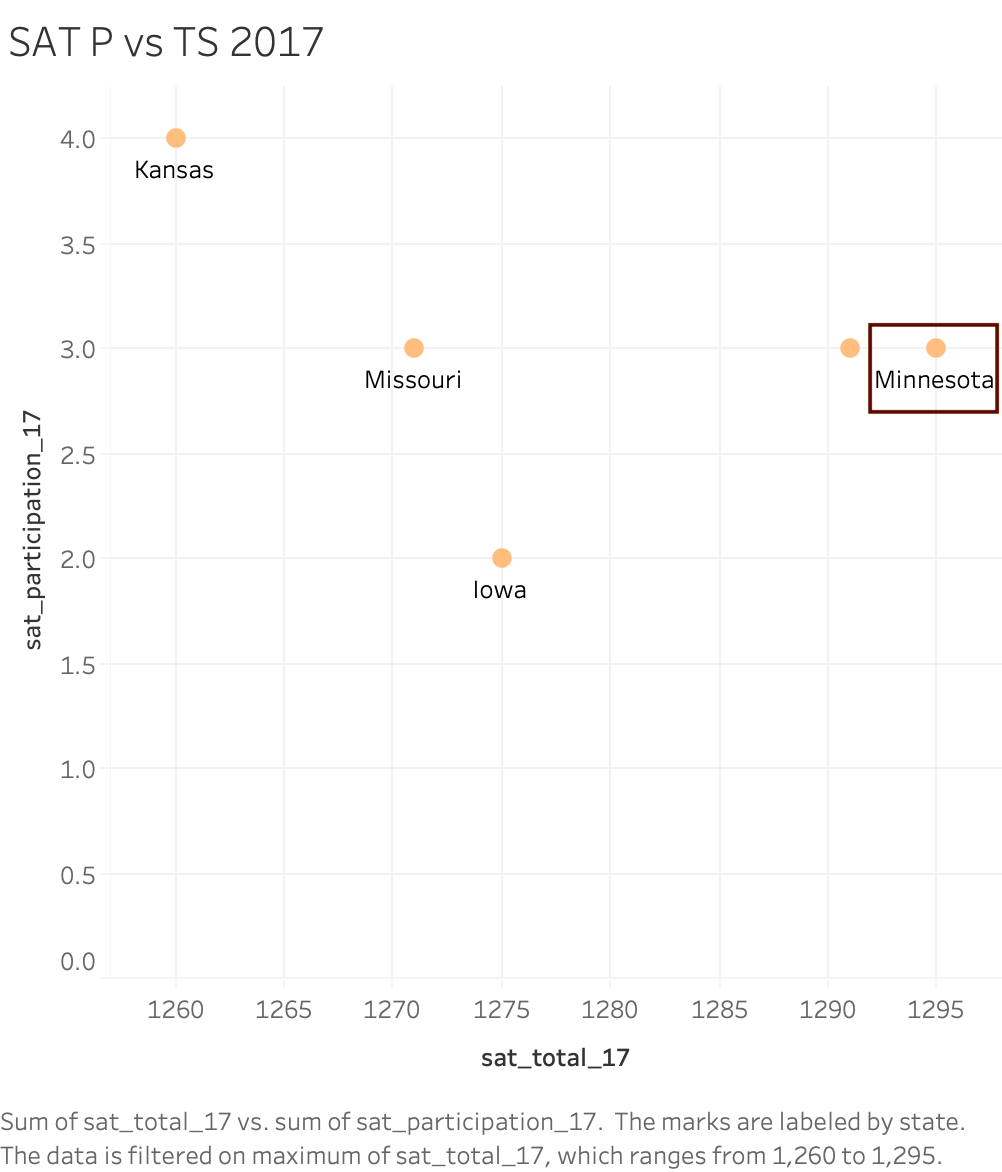
</div>

<div>
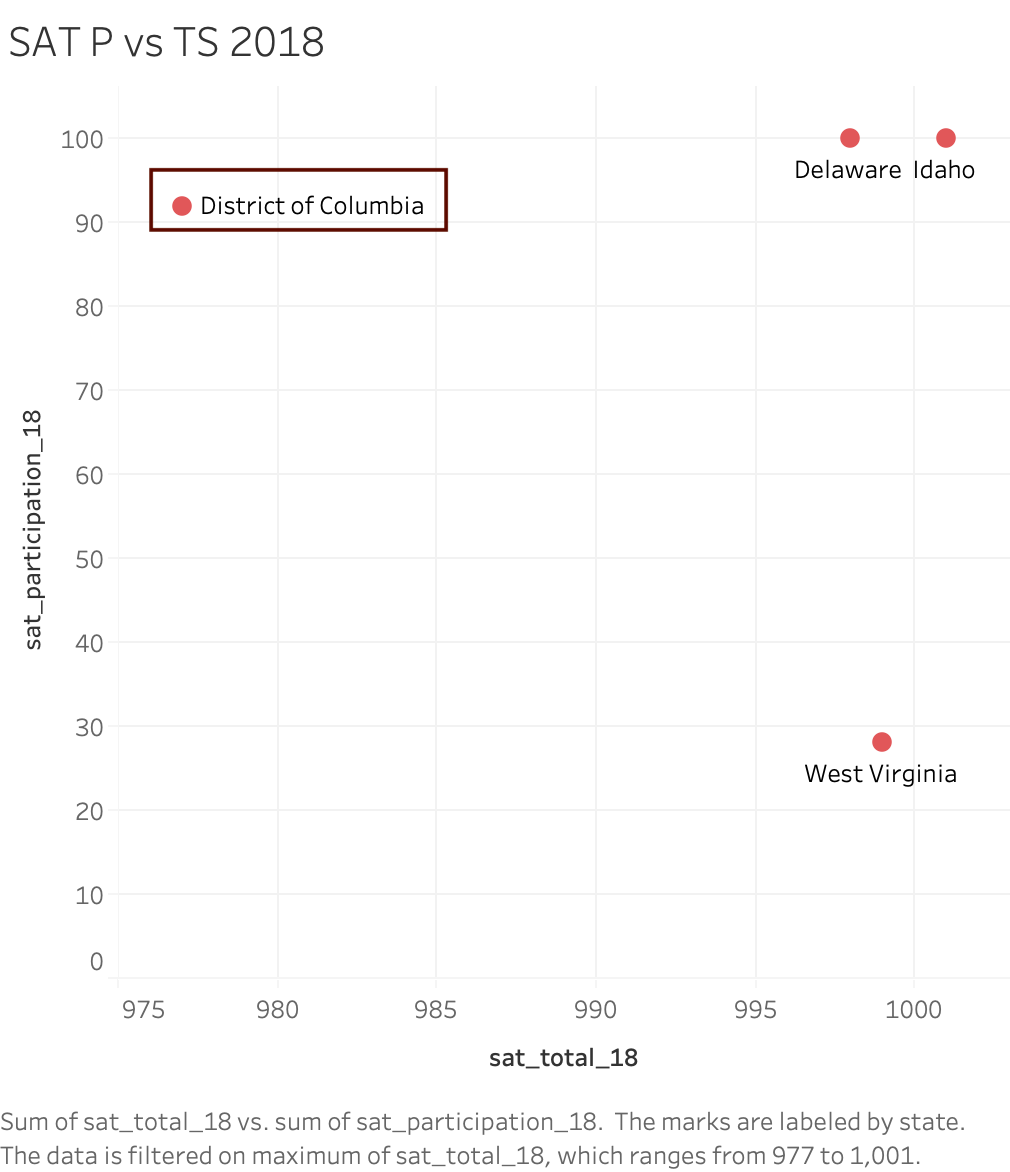
</div>

<div>
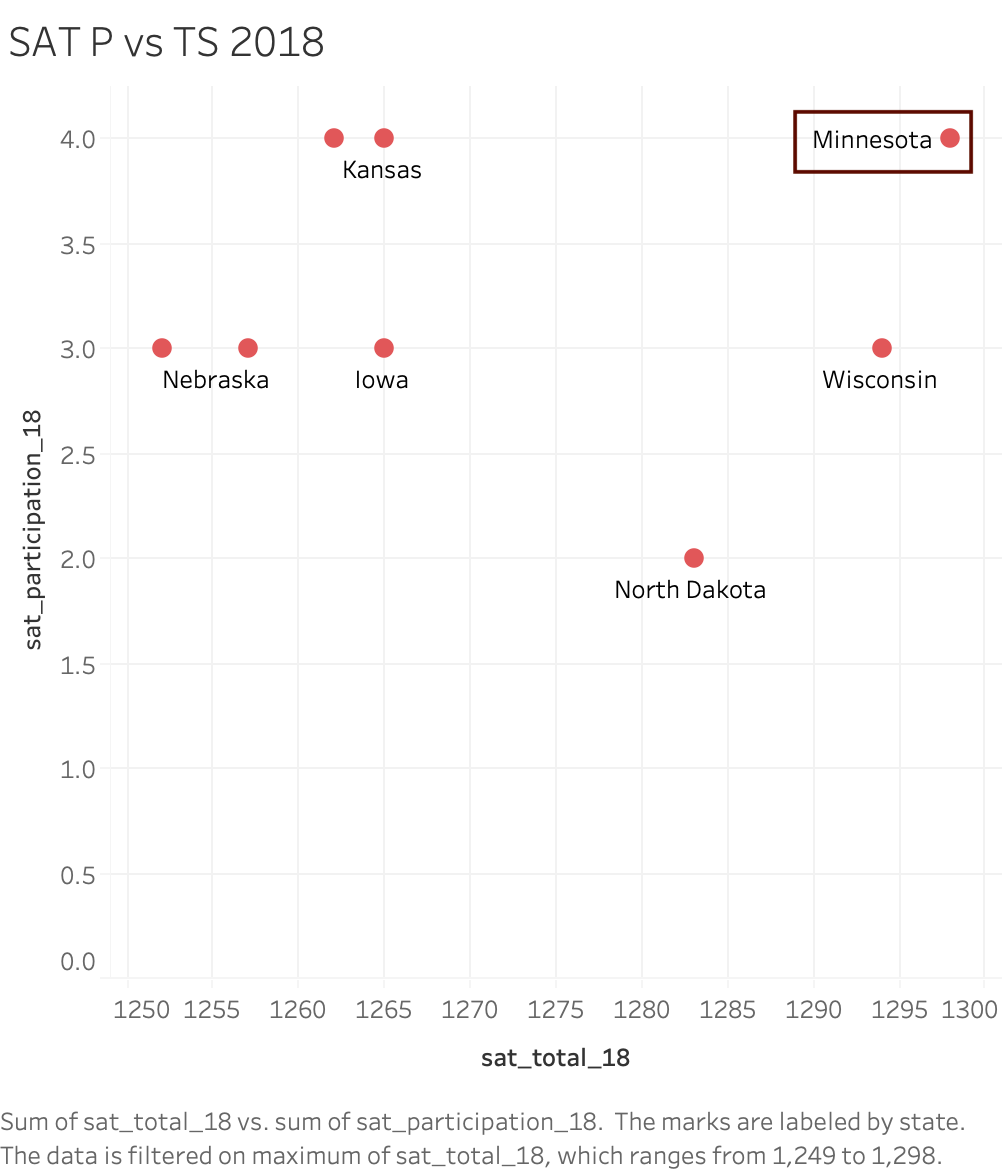
</div>


Colorado and Illinois experienced a drastic increase in participation rate from 2017-2018.

With the effect of 2017, Colorado and Illinois made it mandatory that all high school juniors will take the SAT. This testing is part of statewide high school accountability and every student is required to participate. This explains the almost tenfold increase in participation (11% to 100%) for the state of Colorado and increase in participation (9% to 99%) for the state of Illinois from 2017-2018.

Citations:
1. https://www.testive.com/colorado-sat-change-2017/
2. https://www.testive.com/illinois/

<div>
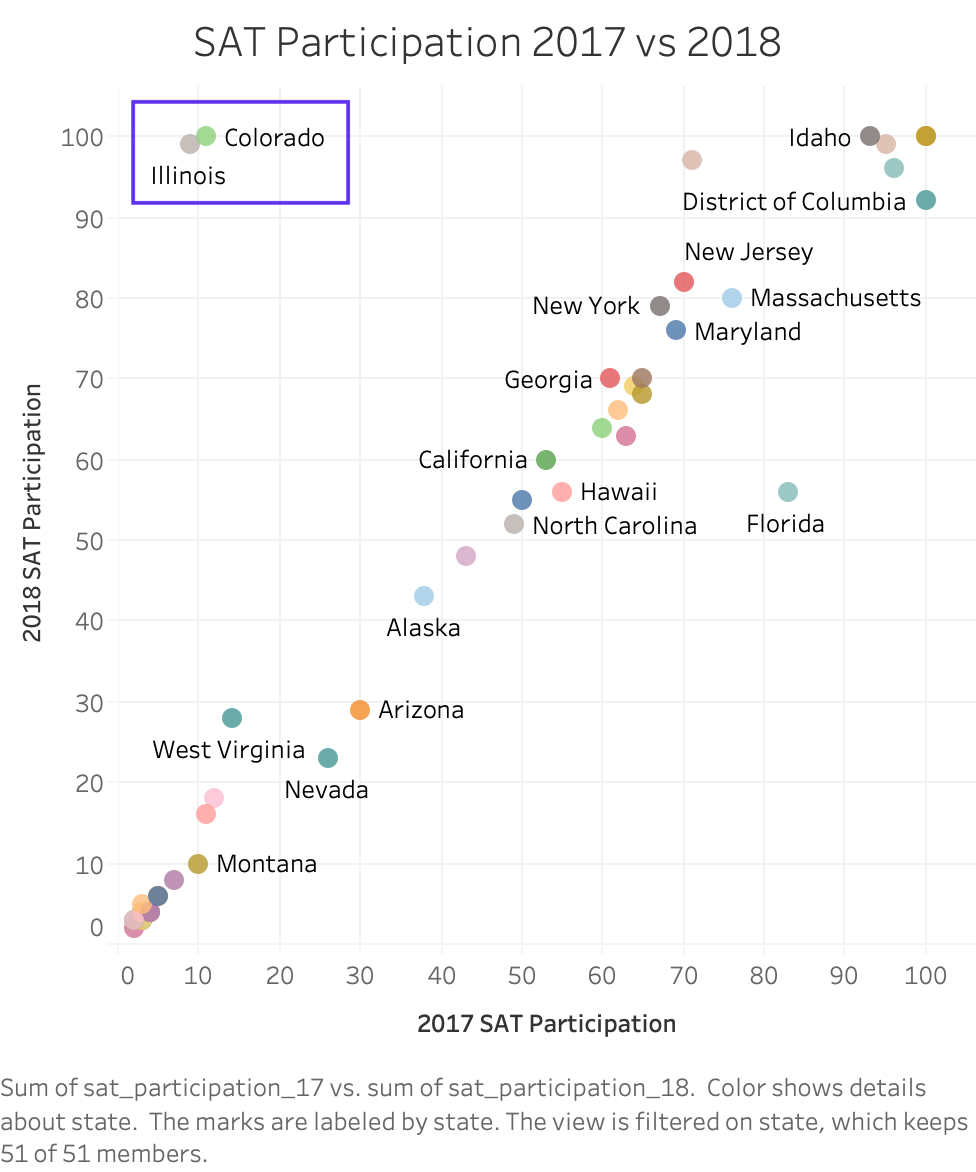
</div>


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

# Finding out the prominent test in each state (for 2018)

In [423]:
final.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18
0,Alabama,1.00,18.9,18.4,19.7,19.4,0.192,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,0.198,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,0.197,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,0.194,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,0.228,0.53,531,594,1055,0.27,22.7,0.60,540,536,1076


In [424]:
final_prominent = final[['state','act_participation_18','sat_participation_18']]

In [425]:
final_prominent

,state,act_participation_18,sat_participation_18
0,Alabama,1.00,0.06
1,Alaska,0.33,0.43
2,Arizona,0.66,0.29
3,Arkansas,1.00,0.05
4,California,0.27,0.60
5,Colorado,0.30,1.00
6,Connecticut,0.26,1.00
7,Delaware,0.17,1.00
8,District of Columbia,0.32,0.92
9,Florida,0.66,0.56


In [426]:
final_prominent['SAT Dominant'] = (final_prominent['sat_participation_18'] >=final_prominent['act_participation_18'])
print(final_prominent)

                   state  act_participation_18  sat_participation_18  \
0                Alabama                  1.00                  0.06   
1                 Alaska                  0.33                  0.43   
2                Arizona                  0.66                  0.29   
3               Arkansas                  1.00                  0.05   
4             California                  0.27                  0.60   
5               Colorado                  0.30                  1.00   
6            Connecticut                  0.26                  1.00   
7               Delaware                  0.17                  1.00   
8   District of Columbia                  0.32                  0.92   
9                Florida                  0.66                  0.56   
10               Georgia                  0.53                  0.70   
11                Hawaii                  0.89                  0.56   
12                 Idaho                  0.36                  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [427]:
final_prominent.to_csv('final_prominent.csv')

<div>
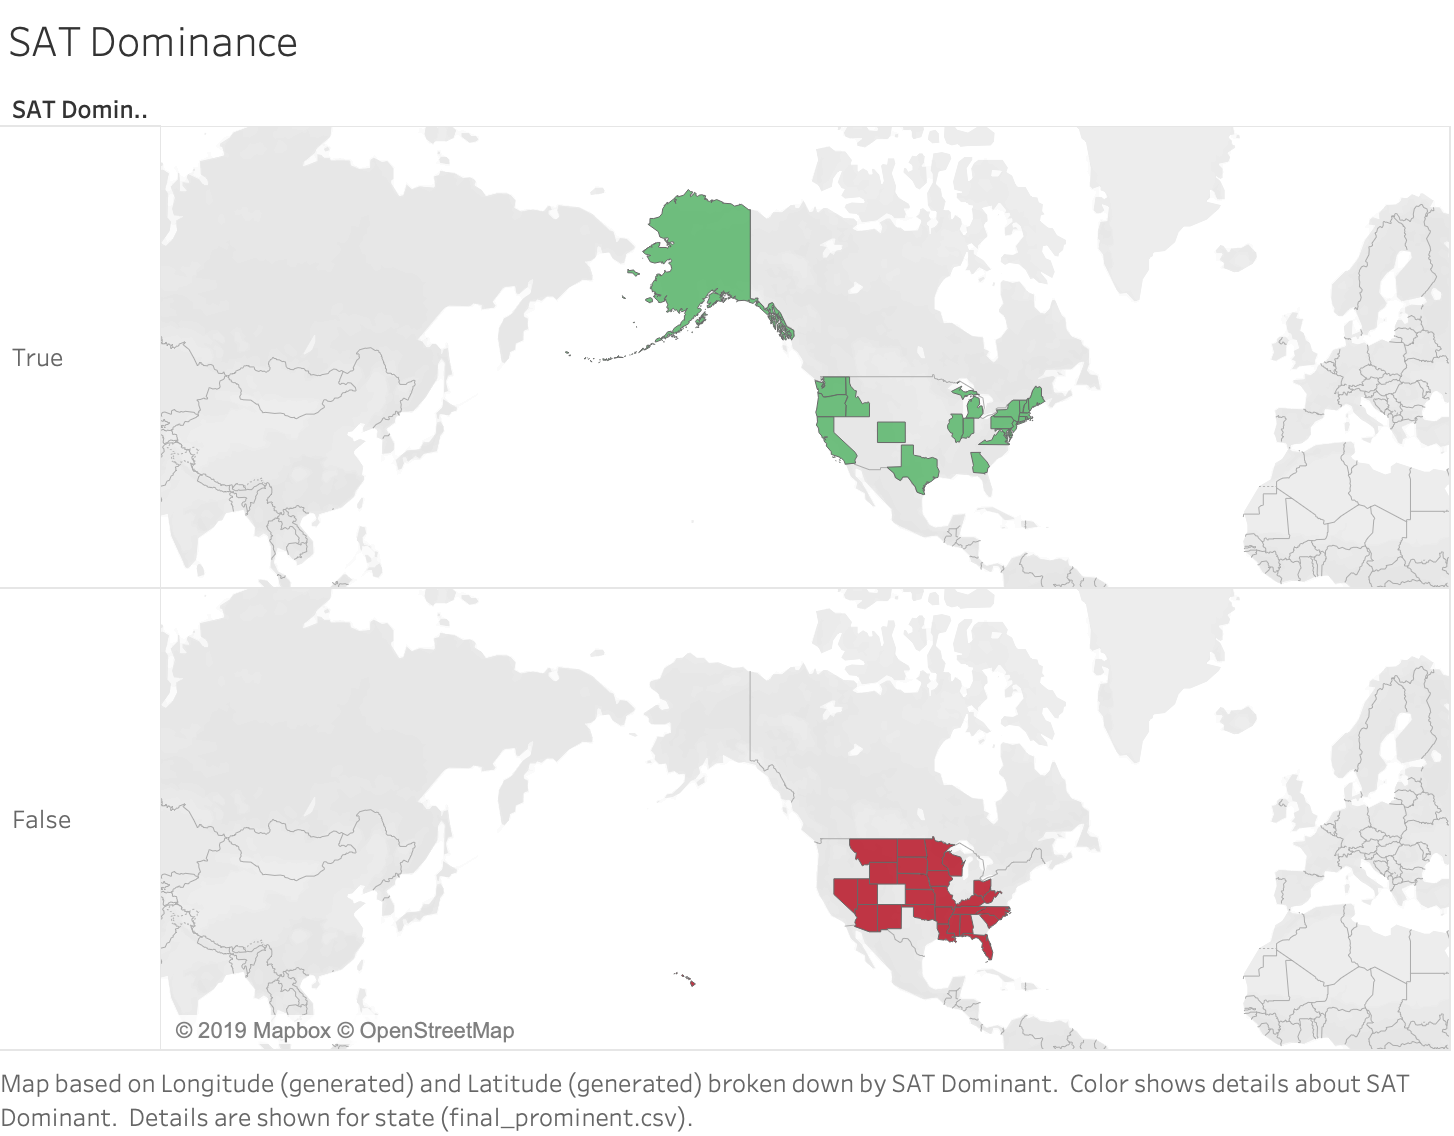
</div>

# Selecting Recommendation States

States that doesn't have:

a very high ACT participation rate
- as it suggests mandatory ACT testing which probably means the efforts to increase SAT will be ineffective as it is unlikely for students to take another test in additional to the mandatory ACT test.

a very high SAT participation rate
- as % growth increase wise would be higher if efforts are directed to states with lower SAT participation rate

a very high student population rate
- as % growth increase wise increase would be higher if efforts are directed to states with lower student population

Sates that have:

a significant growth in total score over 2017-2018
- as it indicates a potential to be high performing state and the positive receptiveness to changes

In [464]:
#Looking at states with SAT participation rate lesser than 0.65
final[(final['sat_participation_18'] < 0.65)  ][['state','act_participation_18','sat_participation_18']]

,state,act_participation_18,sat_participation_18
0,Alabama,1.00,0.06
1,Alaska,0.33,0.43
2,Arizona,0.66,0.29
3,Arkansas,1.00,0.05
4,California,0.27,0.60
9,Florida,0.66,0.56
11,Hawaii,0.89,0.56
14,Indiana,0.32,0.63
15,Iowa,0.68,0.03
16,Kansas,0.71,0.04


In [471]:
#Looking at states with SAT participation rate lesser than 0.65 and SAT participation rate lesser than 0.50
final[(final['sat_participation_18'] < 0.65) & (final['act_participation_18'] < 0.50)  ][['state','act_participation_18','sat_participation_18']]

,state,act_participation_18,sat_participation_18
1,Alaska,0.33,0.43
4,California,0.27,0.60
14,Indiana,0.32,0.63
37,Oregon,0.42,0.48
45,Vermont,0.24,0.64


In [444]:
final_state_select = final[(final['act_participation_17'] < 0.50) & (final ['act_participation_17'] < 0.50) & (final ['act_participation_18'] < 0.50) & (final ['act_participation_18'] < 0.50)]



In [486]:
final['Difference in SAT score 17-18'] = final['sat_total_18'] - final['sat_total_17']

,state,act_participation_18,sat_participation_18
1,Alaska,0.33,0.43
4,California,0.27,0.60
14,Indiana,0.32,0.63
37,Oregon,0.42,0.48
45,Vermont,0.24,0.64


In [487]:
final.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_ebrw_17,sat_math_17,sat_total_17,act_participation_18,act_composite_18,sat_participation_18,sat_ebrw_18,sat_math_18,sat_total_18,Difference,Difference in SAT score 17-18
0,Alabama,1.00,18.9,18.4,19.7,19.4,0.192,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166,1,1
1,Alaska,0.65,18.7,19.8,20.4,19.9,0.198,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106,26,26
2,Arizona,0.62,18.6,19.8,20.1,19.8,0.197,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149,33,33
3,Arkansas,1.00,18.9,19.0,19.7,19.5,0.194,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169,-39,-39
4,California,0.31,22.5,22.7,23.1,22.2,0.228,0.53,531,594,1055,0.27,22.7,0.60,540,536,1076,21,21


In [488]:
#Looking at states with SAT participation rate lesser than 0.65 and SAT participation rate lesser than 0.50 and Difference in SAT score 17-18 of more than 20 ()
final[(final['sat_participation_18'] < 0.65) & (final['act_participation_18'] < 0.50) & (final['Difference in SAT score 17-18'] > 20)   ][['state','act_participation_18','sat_participation_18','Difference in SAT score 17-18']]

,state,act_participation_18,sat_participation_18,Difference in SAT score 17-18
1,Alaska,0.33,0.43,26
4,California,0.27,0.60,21


The Main Findings:

1. The ACT test had higher participation rates than the SAT test among the 50 states based on the data
2. States with high ACT participation rates tend to have low SAT participation rates and vice versa
3. There is a negative correlation between participation rates and test scores
4. The SAT test has higher participation rates in coastal regions as compared to the mid region  

Recommendations in selecting a state to increase participation rate:

- I would focus on states that doesn't have a very high ACT participation rate (probale ACT mandatory testing) and very high SAT participation rate and ideally in the mid region of the country
- I would also focus on states with a significant change in total test scores from 2017-2018 which will indicate the potential of being high peforming state and more receptive to positive changes.



For the 2018

Alaska:

SAT Test Takers = 3,334
High School Graduates = 7,796
SAT Participation Rate = 43%

California:

SAT Test Takers = 435,365
High School Graduates = 262,228
SATParticipationRate = 60%


https://reports.collegeboard.org/pdf/2018-alaska-sat-suite-assessments-annual-report.pdf
https://reports.collegeboard.org/pdf/2018-california-sat-suite-assessments-annual-report.pdf

Assumption made: 

1. The number of high school graduates will not change drastically every year and it is approximately appropriate for future year projections
2. Money allocated  by the Central Board will be the same irregardless of which state is recommended to improve SAT participation rates.



# Final Recommendation:

It will make more sense for Central Board to allocate the money and resources to a state with much lesser high school graduate population as the % growth increase will be greater.Also the allocation of money and resources per student will be much higher which in turn might bring about better results.


Therefore, my recommended state will be Alaska. 

# Future Consideration:

There is a distinct negative correlation between participation rates and test scores, where the higher the participation rates, the lower the test scores (and vice versa) . If the College Board decides to focus solely on increasing participation rates and ultimately achieving the ideal of a 100% participation rate, there is a very high chance that it might pave the way in deteriorating the test scores of the students

I recommend that College Board will shift its focus away from participation rate and more towards improving test scores by improving the access to test prep resources, allocating money to reduce the finanical burden students might have to encourage them to take SATs etc.


Suggestions in improving data collection:

As the composite ACT score is scaled differently from total SAT score, finding their average % against each individual maximum perfect score will enable analysis more representative.

- Collecting more granular data such as the particiaption district and school level in each state will give a better overall overview of the data collected